# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objectives

1. To predict whether a liability customer will buy personal loans
2. To understand which customer attributes are most significant in driving purchases
3. Identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# to work with structured data
import pandas as pd
import numpy as np 

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to split the data into train & test datasets
from sklearn.model_selection import train_test_split 
# to build the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# to check model performance
from sklearn import metrics

# To ignore warnings about deprecation of passing pallette without assigning hue
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# read the data
df = pd.read_csv('Loan_Modelling.csv')

# Let's also create a copy, just in case we want to work out look back at the original dataframe or restore from it.
dfcopy = df.copy()

# returns the first 5 rows
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

* Observations
* Sanity checks

### Shape of the Dataset

In [4]:
# To find the shape of the Dataframe (number of records & number of variables)
df.shape

(5000, 14)

### Info

In [5]:
# Now we can check the different independent features available in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Look at a few records

In [6]:
# Let's look at a few records in the dataset to get a feel of the contents
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [8]:
df.sample(n=10, random_state=1)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


## Data Preprocessing

### Drop Unnecessary Columns

In [9]:
# It is obvious that the ID variable although numerical, isn't adding any value to the data & hence can be dropped.
df.drop('ID', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


### Looking for Duplicated Records

In [11]:
# making sure there are no duplicate records
df.duplicated().sum()

0

### Describe (Statistical Summary)

In [12]:
# Let's look at the statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


***Experience*** seems to be having negative values in them as can be seen in the min value for the same.

### Identify records having Negative values

In [13]:
# Let's look at how many negative values we have in the Experience column.
df[df['Experience']<0].shape

(52, 13)

In [14]:
# Let's look at a few of the users showing negative values
df[df['Experience']<0].head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


### Treat Negative values

In [15]:
# Let's replace the Experience from negative to positive values, which could have been a data entry error.
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)

In [16]:
# Let's look at the same rows again to make sure that we imputed only the negative values, leaving other values untouched.
df.iloc[[89,226,315,451,524,536,540,576,583,597],:]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,2,125,92835,2,7.20,1,0,0,1,0,0,1


### Observations so far..
* We observed that there was a column for customer ***ID***, which wasn't adding value to the data, so we dropped it.
* Good thing is that we don't have any null values in any of the columns and also don't have any duplicated records.
* ***Experience*** seems to have negative values, which can't be right. Upon checking it was observed that there were ***52*** records with -ve values.
    * Replaced these negative values with ***0***, indicating no experience.
* The columns ***Personal_Loan***, ***Securities_Account***, ***CD_Account***, ***Online*** & ***CreditCard*** seems to have boolean values in nature.
* The column ***Education*** although has int datatype, the content looks categorical with values ***1***, ***2*** or ***3***
* Similarly the column ***Family*** also can be used for classification since its categorical by nature having values ***1***, ***2***, ***3*** or ***4***
* On a quick glimpse itself, ***Income***, ***CCAvg***, & ***Mortgage*** columns look skewed and could most possibly have outliers, which we will check.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Histograms & Boxplots

In [17]:
# Let's first define a function to perform the Univariate analysis by plotting Histplot & Boxplot for variables.
# This will help us visualize the data distribution and also easily identify skewness and outliers.

def histogram_boxplot(df, feature, figsize=(15,10), kde=False, bins=None):
    """
    Boxplot and histogram combined
 
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # creating the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)
    
    # boxplot with a triangle indicating the mean value of the column
    sns.boxplot(data=df, x=feature, ax=ax_box2, showmeans=True, color="green")
    
    # For histogram
    sns.histplot(data=df, x=feature, kde=True, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(data=df, x=feature, kde=True, ax=ax_hist2)
    
    # Add mean to the histogram
    ax_hist2.axvline(df[feature].mean(), color="purple", linestyle="--")
    
    # Add median to the histogram
    ax_hist2.axvline(df[feature].median(), color="black", linestyle="-")


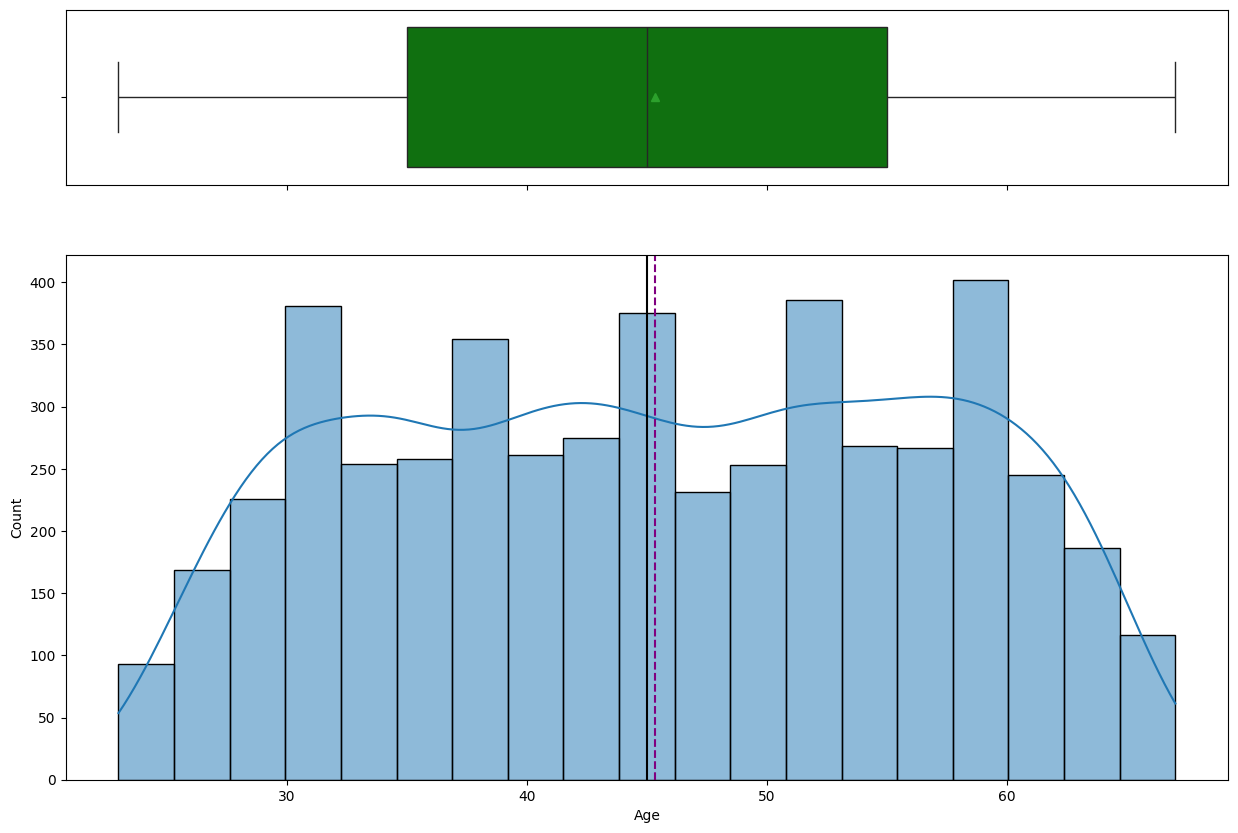

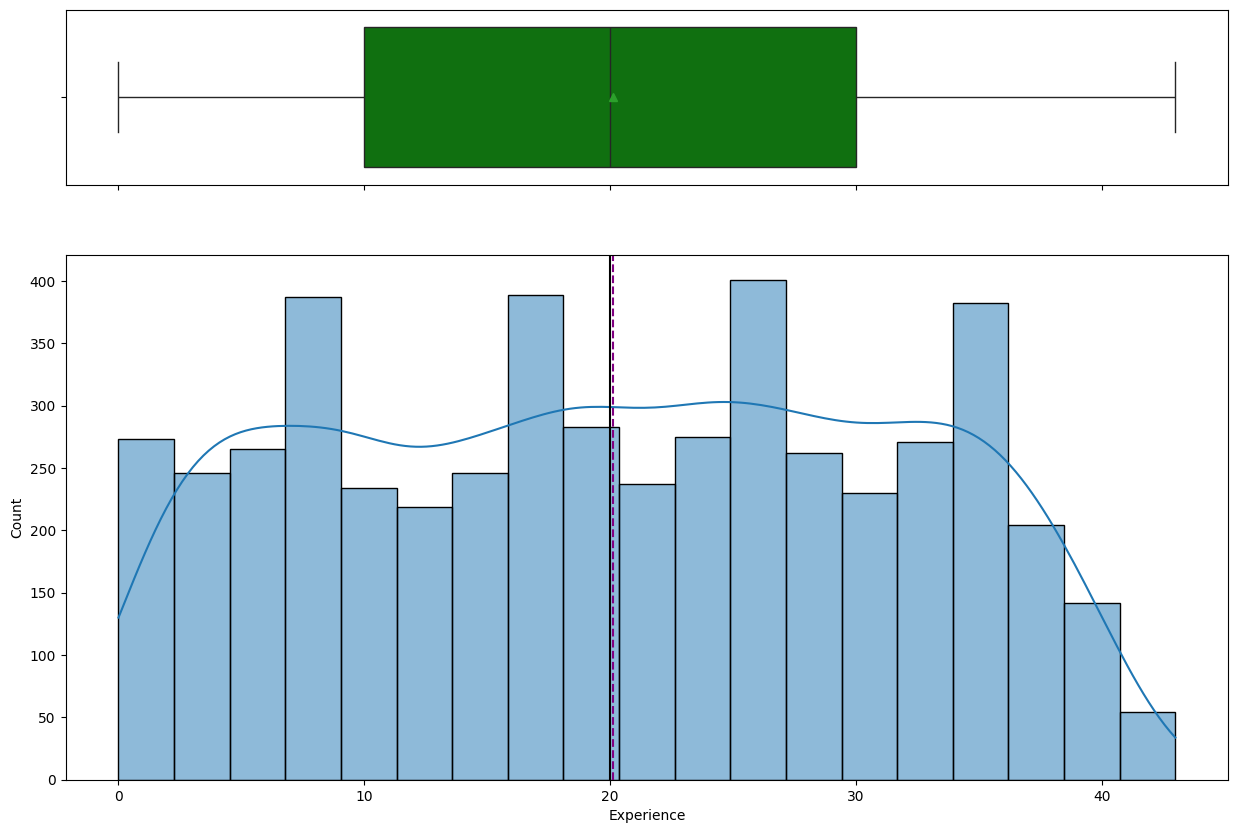

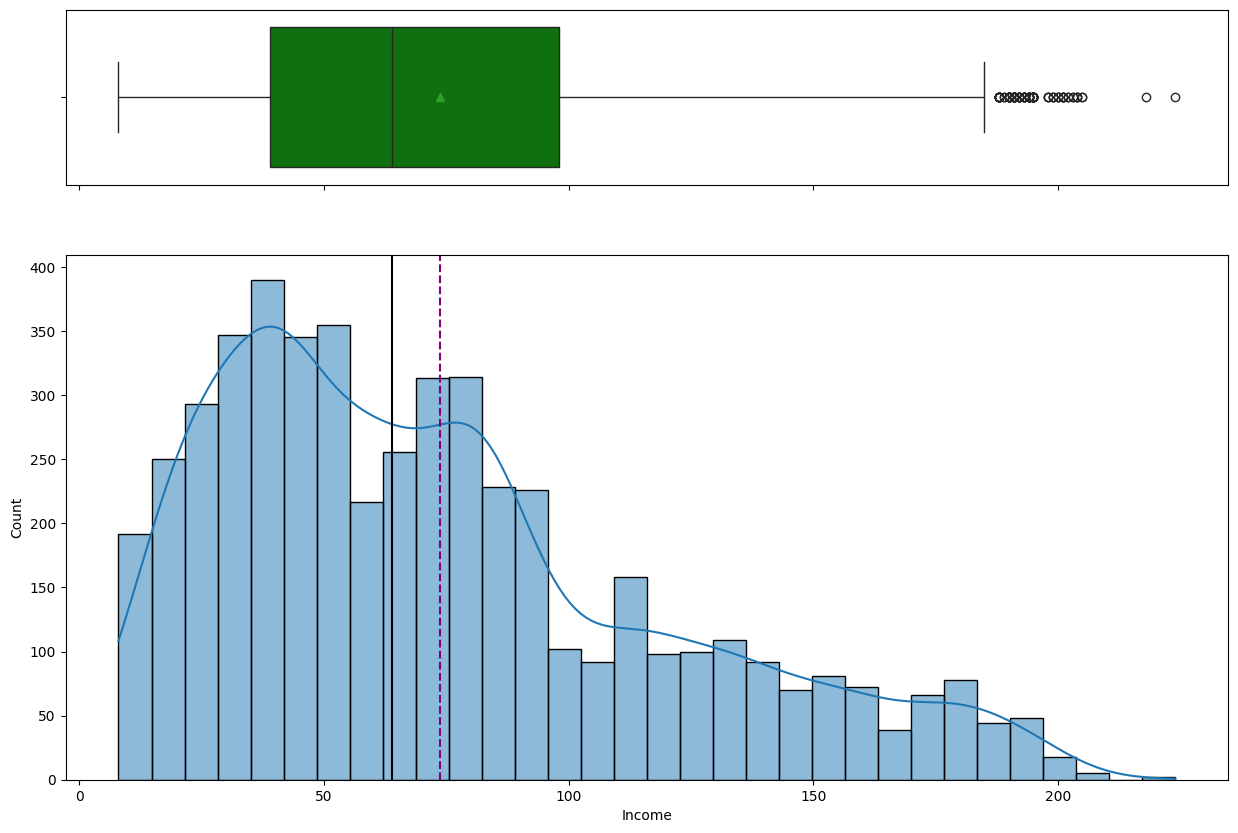

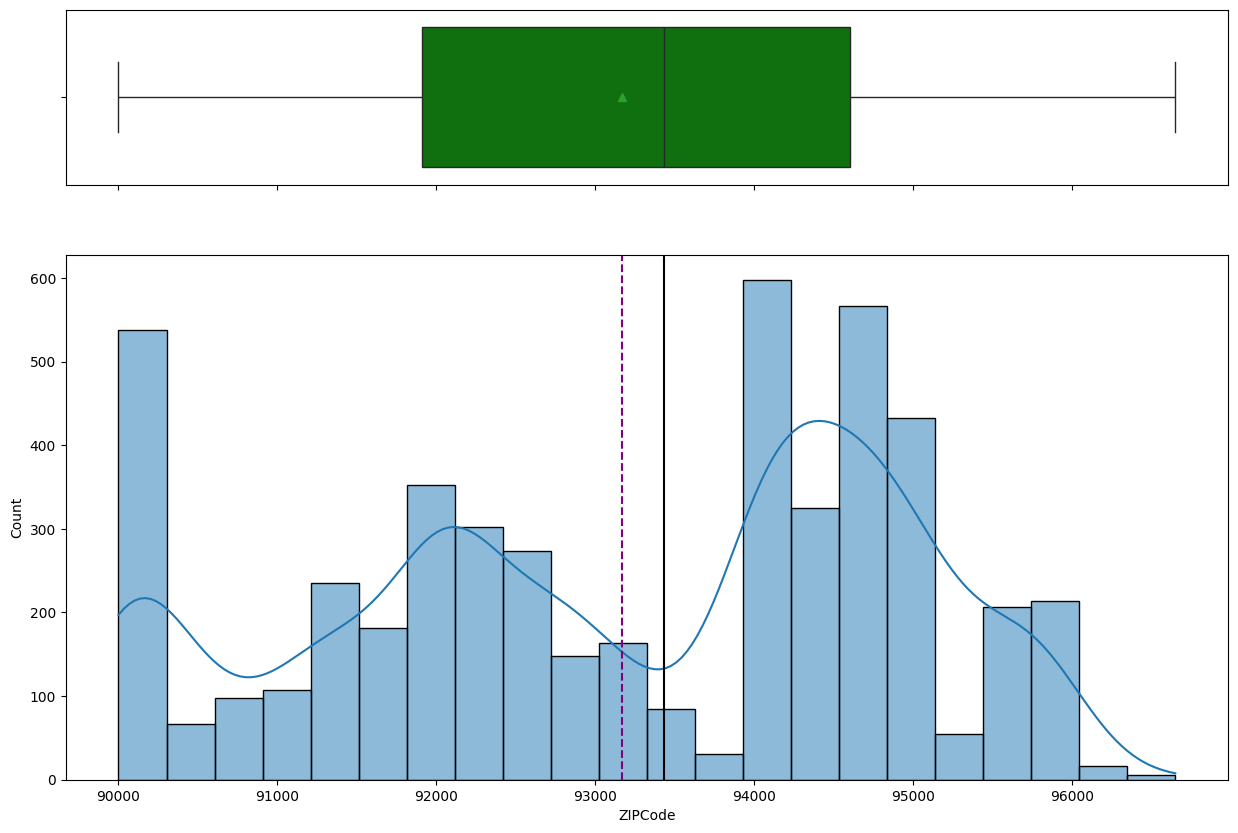

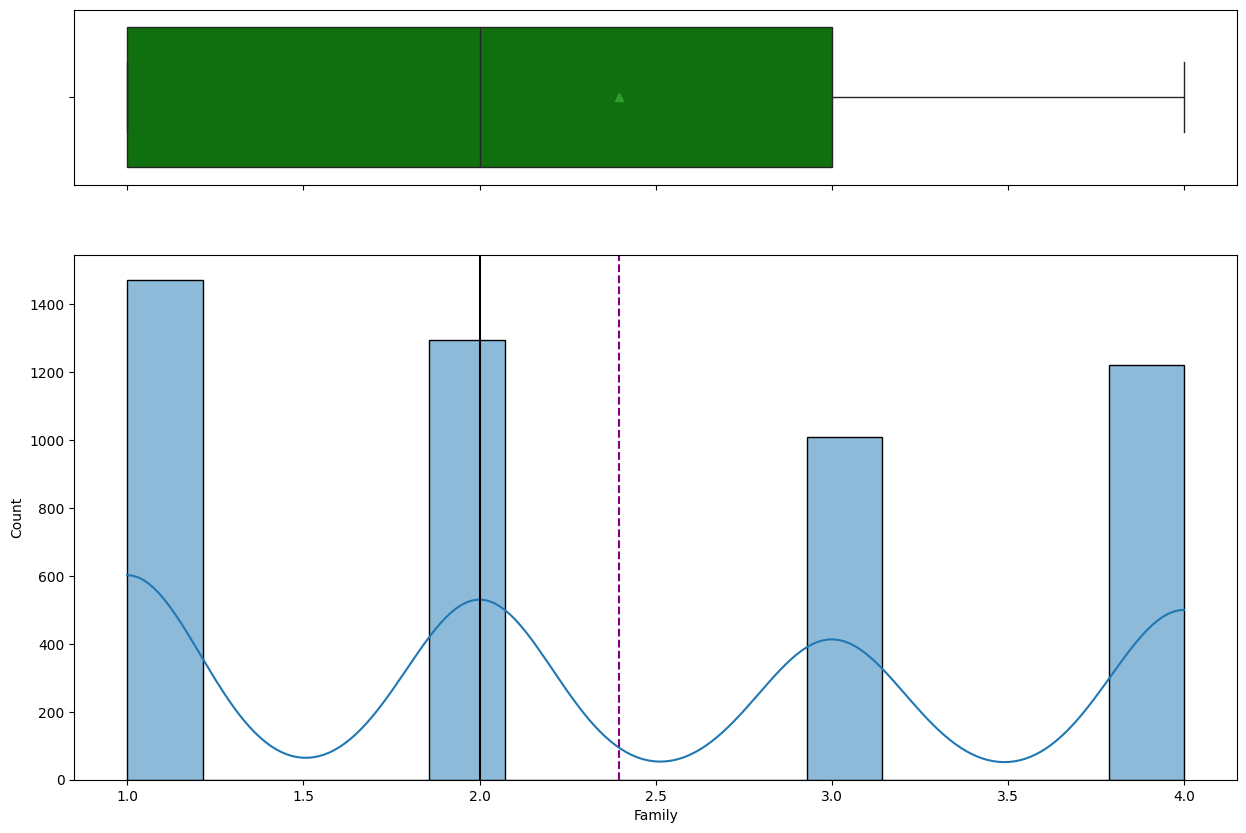

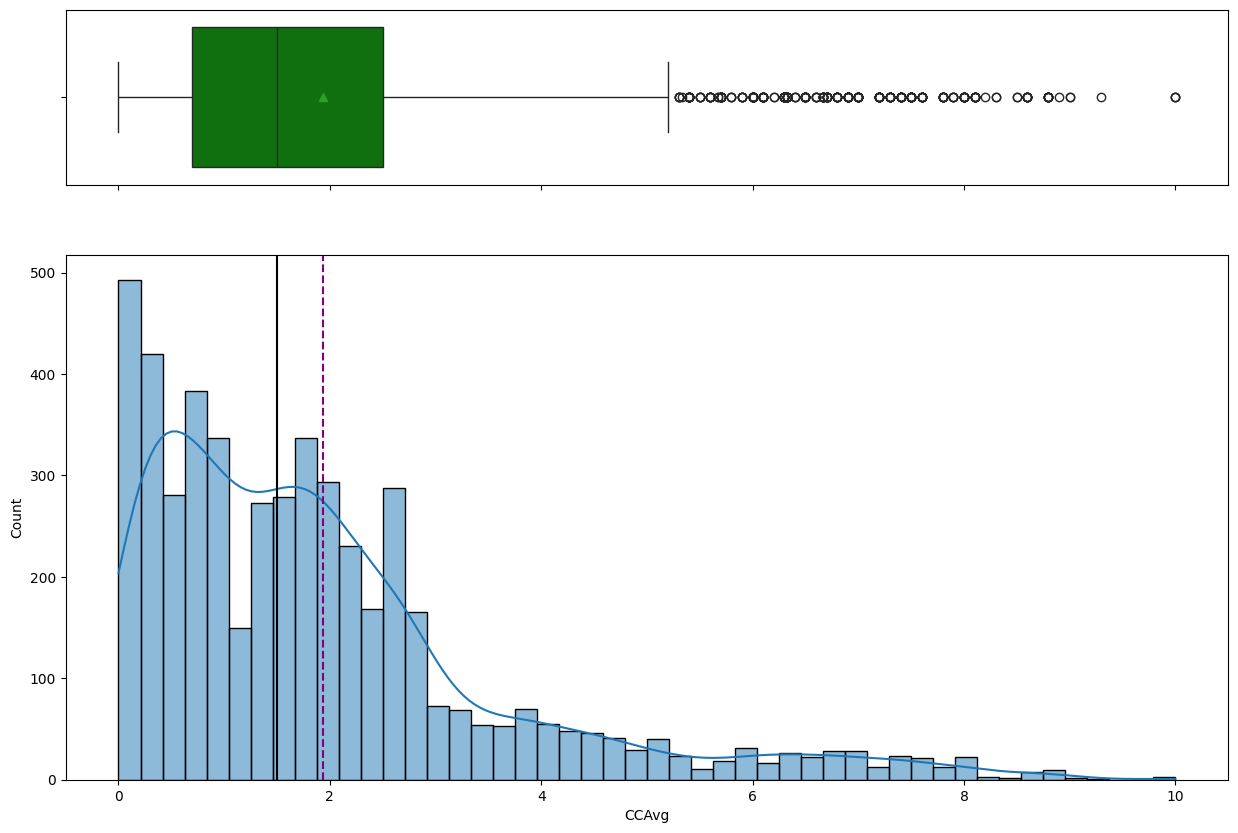

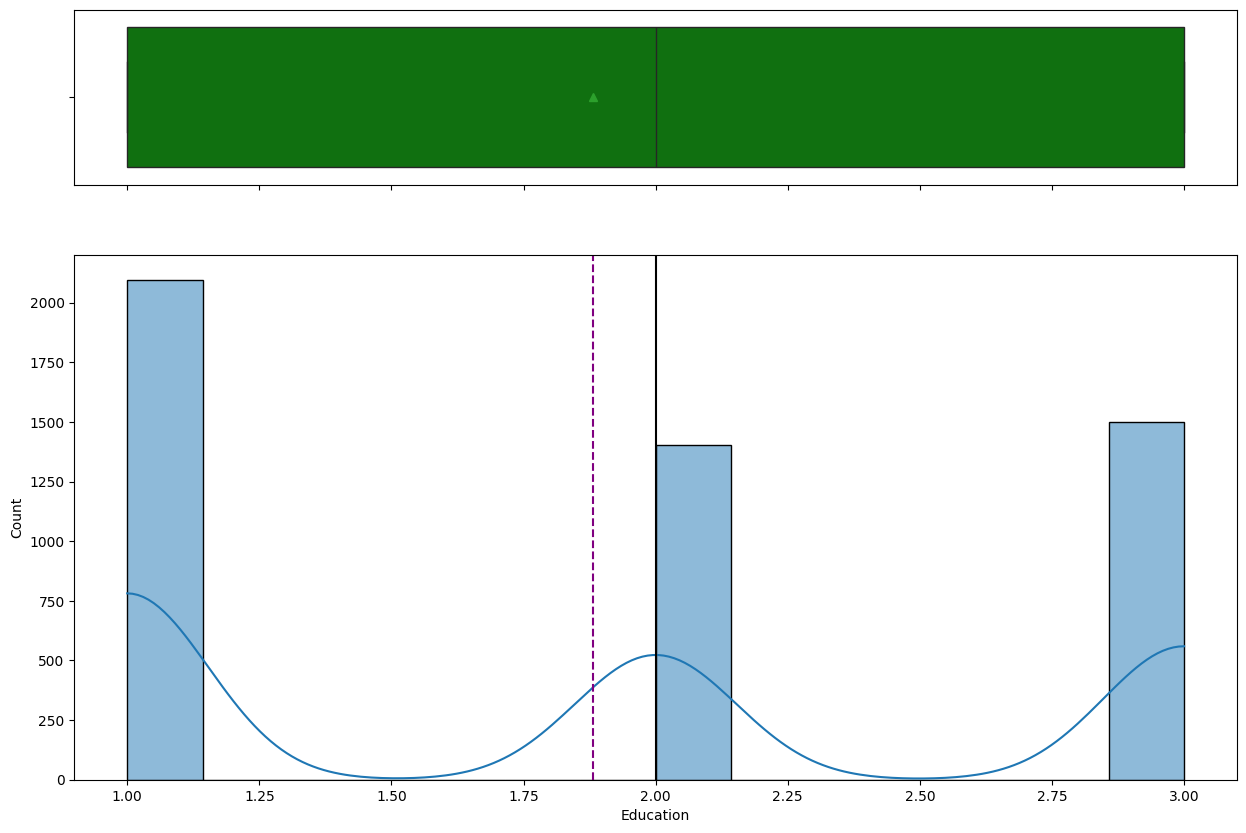

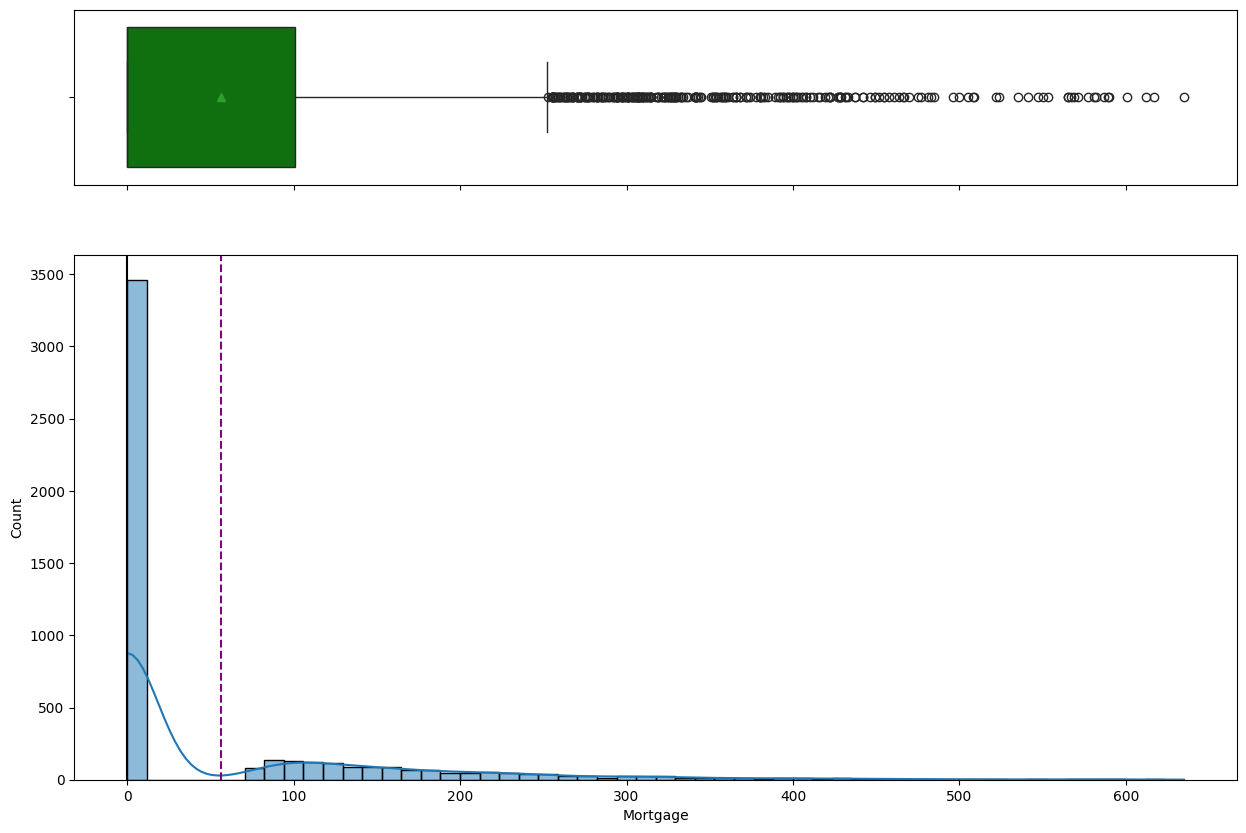

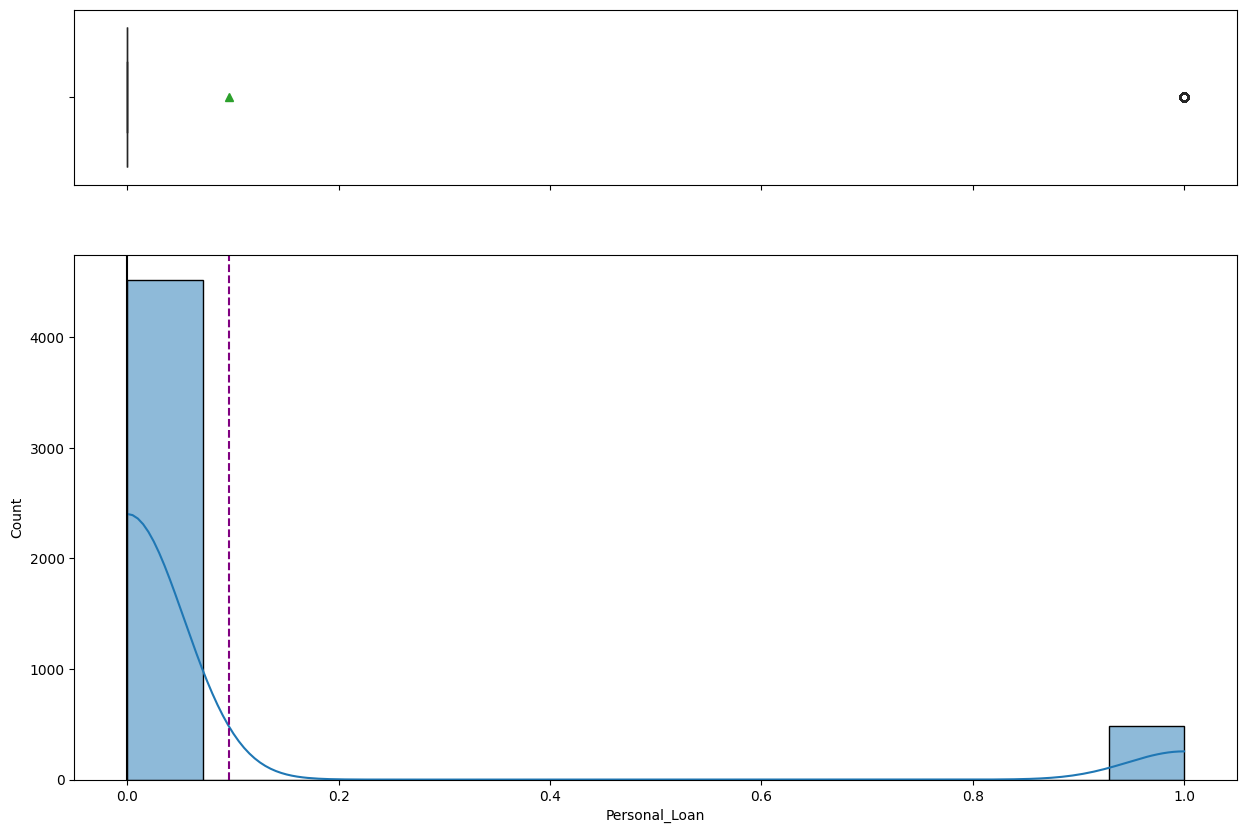

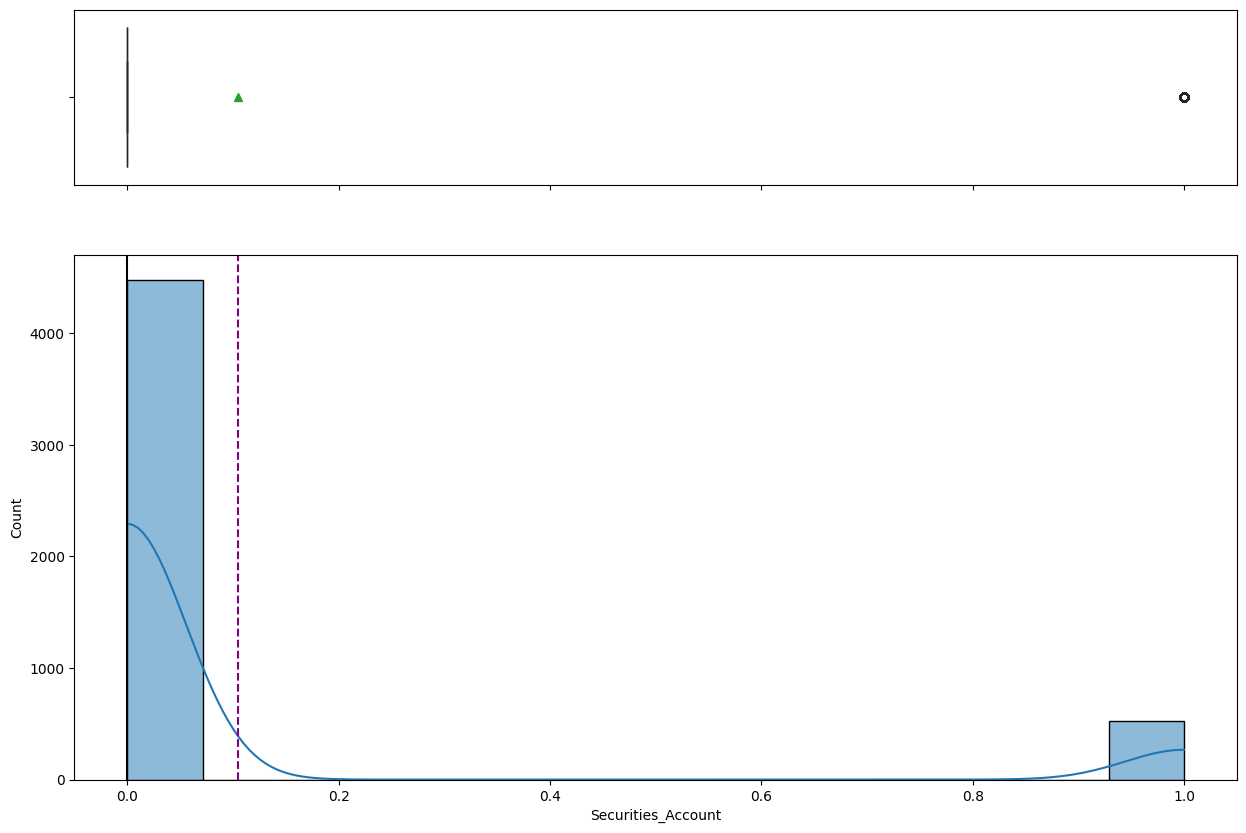

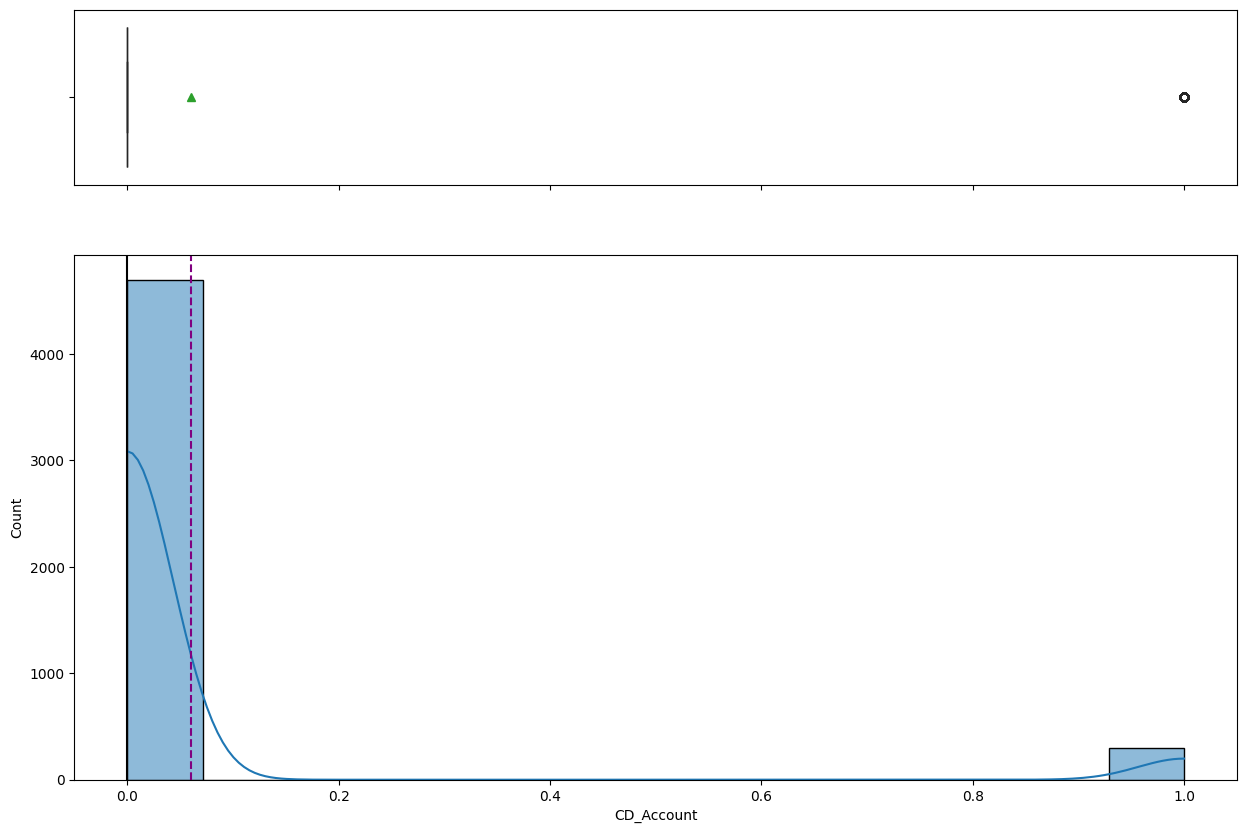

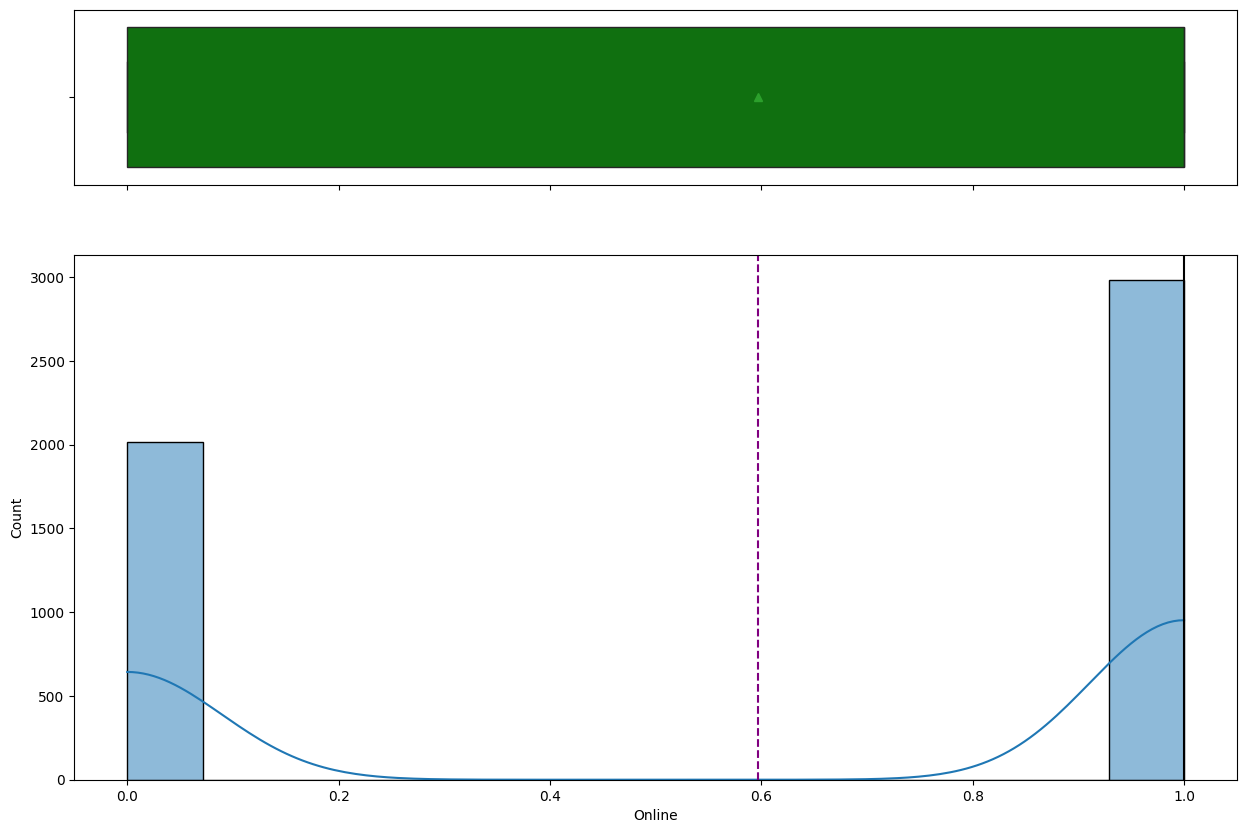

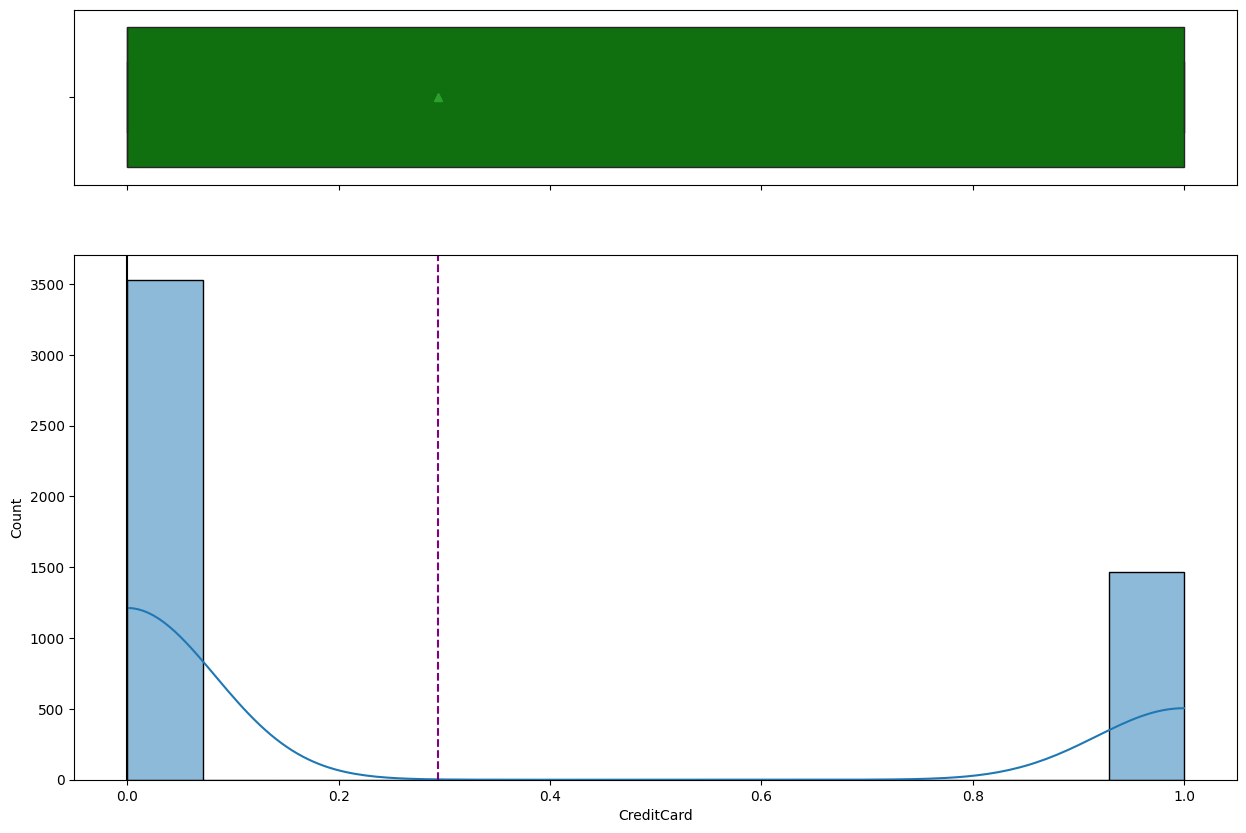

In [18]:
# Calling the histogram_boxplot function to plot histplot & boxplot for Univariate analysis.
cols_list = df.select_dtypes(include=np.number).columns.tolist()
for column in cols_list:
    histogram_boxplot(df, column)

### Labeled Barplots

In [19]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays top n category levels (default is None - display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

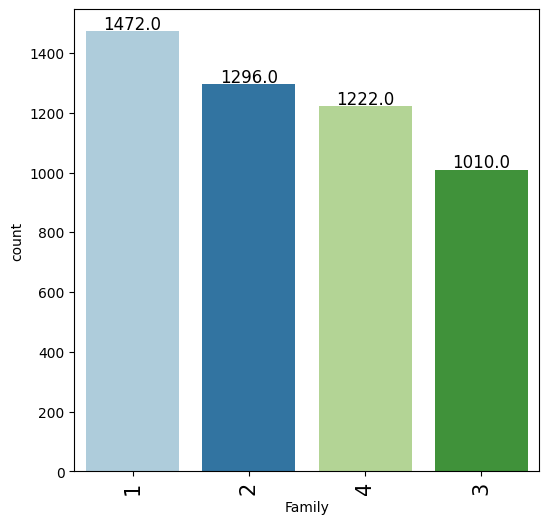

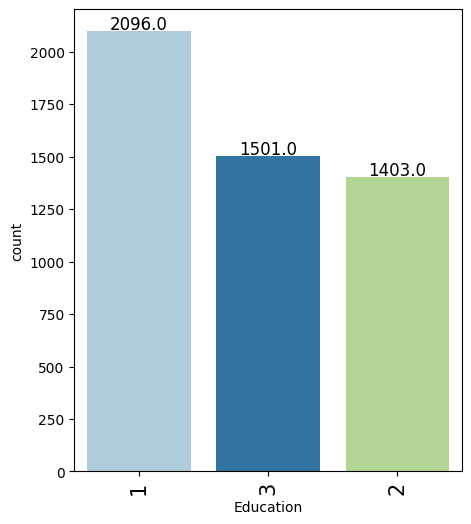

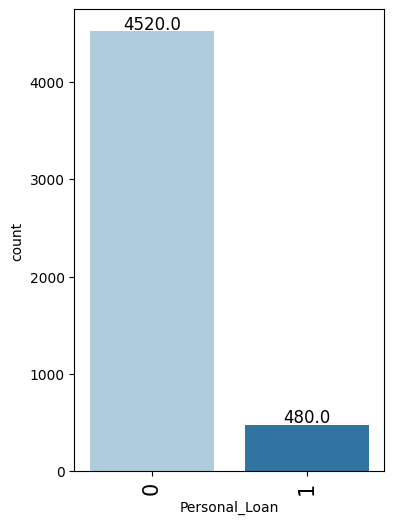

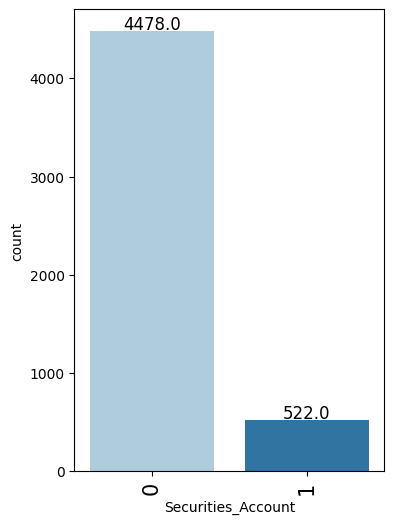

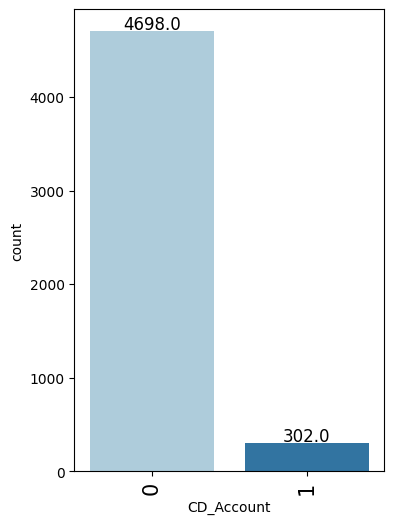

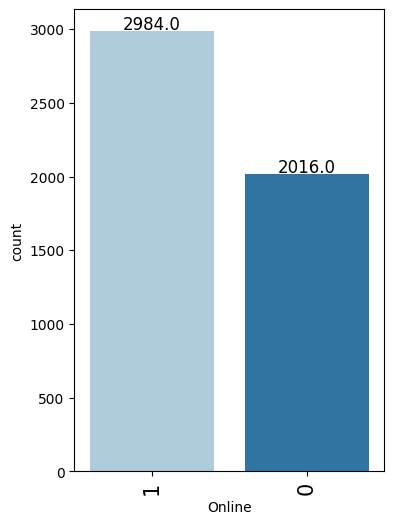

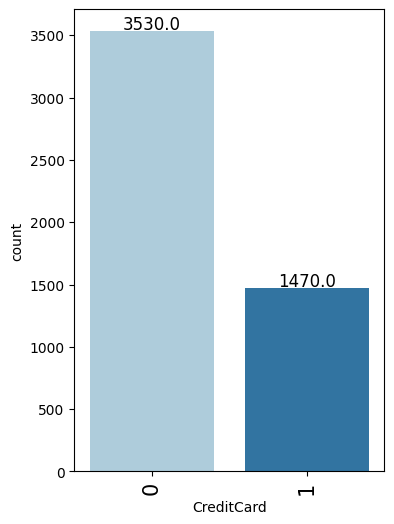

In [20]:
# Calling the labeled_barplot function to plot labeled bar plots for columns having categorical values.
labeled_cols_list = ['Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']
for column in labeled_cols_list:
    labeled_barplot(df, column)

### Observations on Univariate Analysis
* ***Age*** seems to have a normal distribution without any skewness.
* ***Experience*** seems to have a normal distribution without any skewness.
* ***Income***
* All the ***ZIPCode*** seems to be starting with ***9***. So, all the customers could be from the same geographic area.
	* It might be worth checking if we classify customers as liability customers or asset customers based on their ZIP.
* ***Family*** seems to be more categorical in nature with 4 possible values ***1***, ***2***, ***3***, ***4***.
* ***CCAvg*** seems to be right skewed with most customers having less cards & very few customers having too many cards.
* ***Education*** also seems to be categorical in nature with 3 possible values ***1***, ***2***, ***3***
* ***Mortgage*** also is highly right skewed, because most of the customers doesn't have any mortgage, some have mortgages ranging from ***~80k - ~300k***.
	* However, handful of customers have mortgages even higher than ***600k***.
* ***Personal_Loan*** has boolean values with either a ***0*** or ***1***, indicating if customer accepted the person loan in the last campaign.
	* Only ***480*** customers had taken a personal loan during the last campaign.
* ***Securities_Account*** is also boolean, with only ***522*** customers having taken them.
* ***CD_Account*** having boolean values, with ***302*** customers having them.
* ***Online*** again boolean, shows that most of the customers use online banking. However, there are still over ***2000*** customers that don't.
	* This could be an area of interest to the Bank. We will see.
* ***CreditCard*** shows the number of customers holding credit cards from other banks & we can see that most customers don't.

### Heatmap

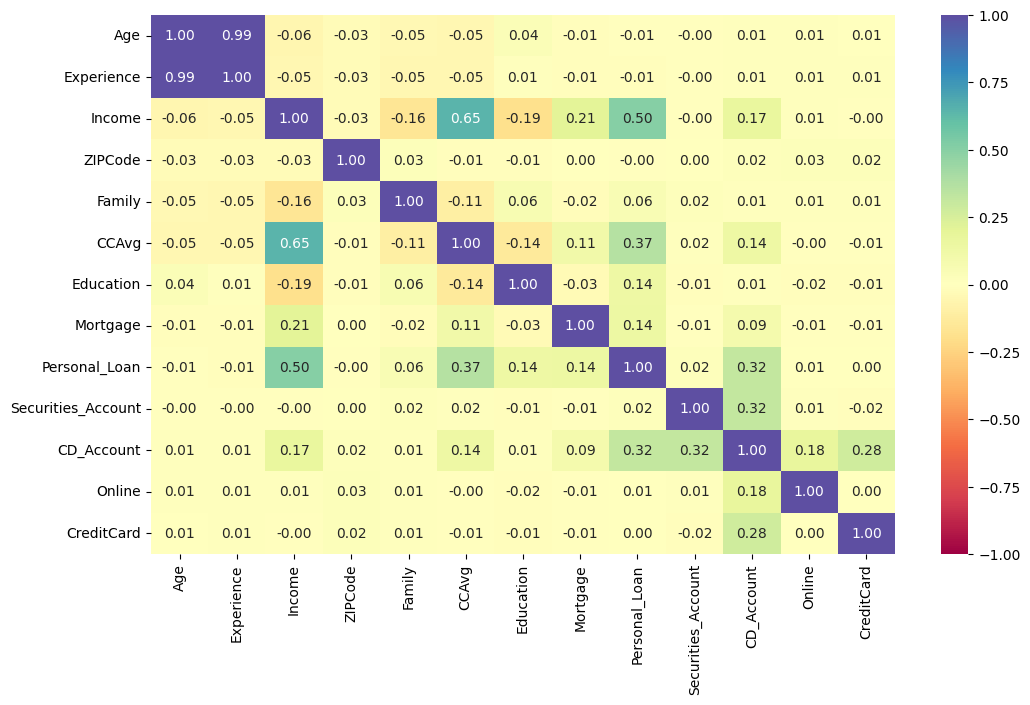

In [21]:
# Let's also perform the Bivariate analysis by plotting Pairplot & Heatmap for the dataframe to show the correlations
# Heatmap
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations on Heatmap
* ***Age*** and ***Experience*** seems to be very highly correlated, which makes sense because customer with higher age are expected to have higher experience.
* Next on the list, we can see customers with higher ***Income*** tend to have a higher ***CCAvg*** as well.
* These customers with higher ***Income*** also seems to be more inclined towards taking a ***Personal_Loan*** as seen from last campaign.
* As a result, even ***CCAvg*** share a relatively positive relationship with ***Personal_Loan***.
* Surprisingly, ***Income*** share a negative relationship with ***Education***, which indicates that customers with higher income have lower education relatively.
* We can also see that customers with higher ***Income*** tend to have smaller ***Family*** size.

### Questions:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

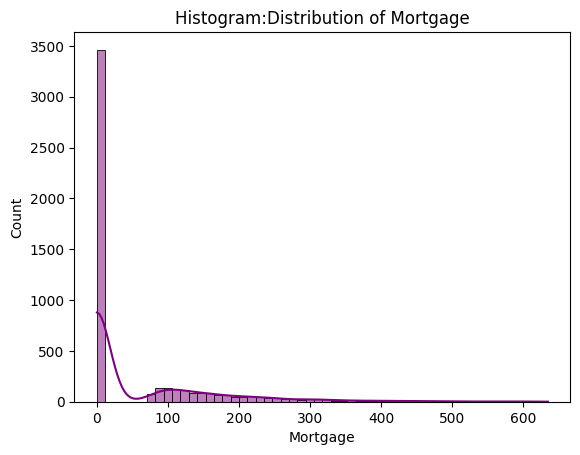

In [22]:
# Looking at the distribution of Mortgage attribute.
plt.title('Histogram:Distribution of Mortgage')
sns.histplot(data=df, x='Mortgage', color='purple', kde=True);

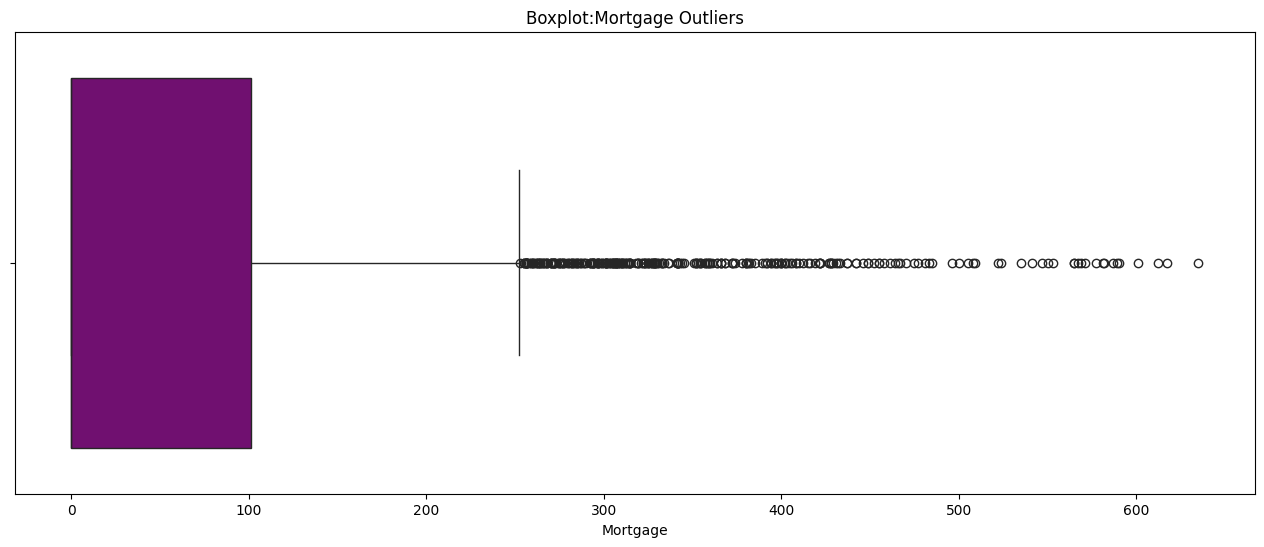

In [23]:
# Building a boxplot for Mortgage attribute to show the outliers
plt.figure(figsize=(16,6))
plt.title('Boxplot:Mortgage Outliers')
sns.boxplot(data=df, x='Mortgage', color='purple');

**Ans 1**. Mortgage attribute has a very highly skewed distribution and has a lot of outliers due a small bunch of customers having very high mortgages.

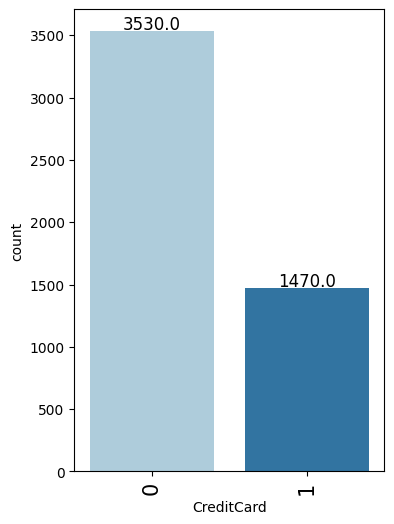

In [24]:
# Let's see how many customers have Credit Cards
#sns.countplot(data=df, x='CreditCard');
labeled_barplot(df, 'CreditCard')

**Ans 2**. There are 1470 customers that hold Credit Cards from other Banks. 

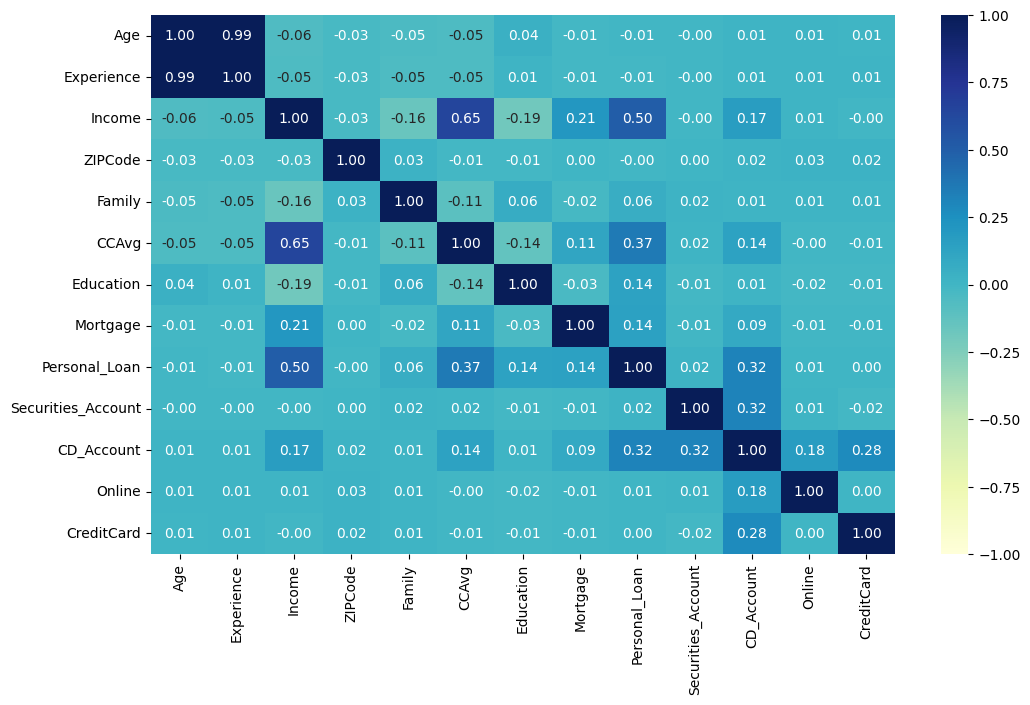

In [25]:
# Drawing a heatmap  to see the correlation of Personal_Loan against other variables
plt.figure(figsize=(12, 7))
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='YlGnBu');
#sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Ans 3**. We can see that the **Personal_Loan** attribute had the highest correlation with the following variables in that order
* **Income**
* **CCAvg**
* **CD_Account**

In [26]:
# defining function to plot distributions w.r.t target, which will help us compare the distribution of a variable w.r.t another variable
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

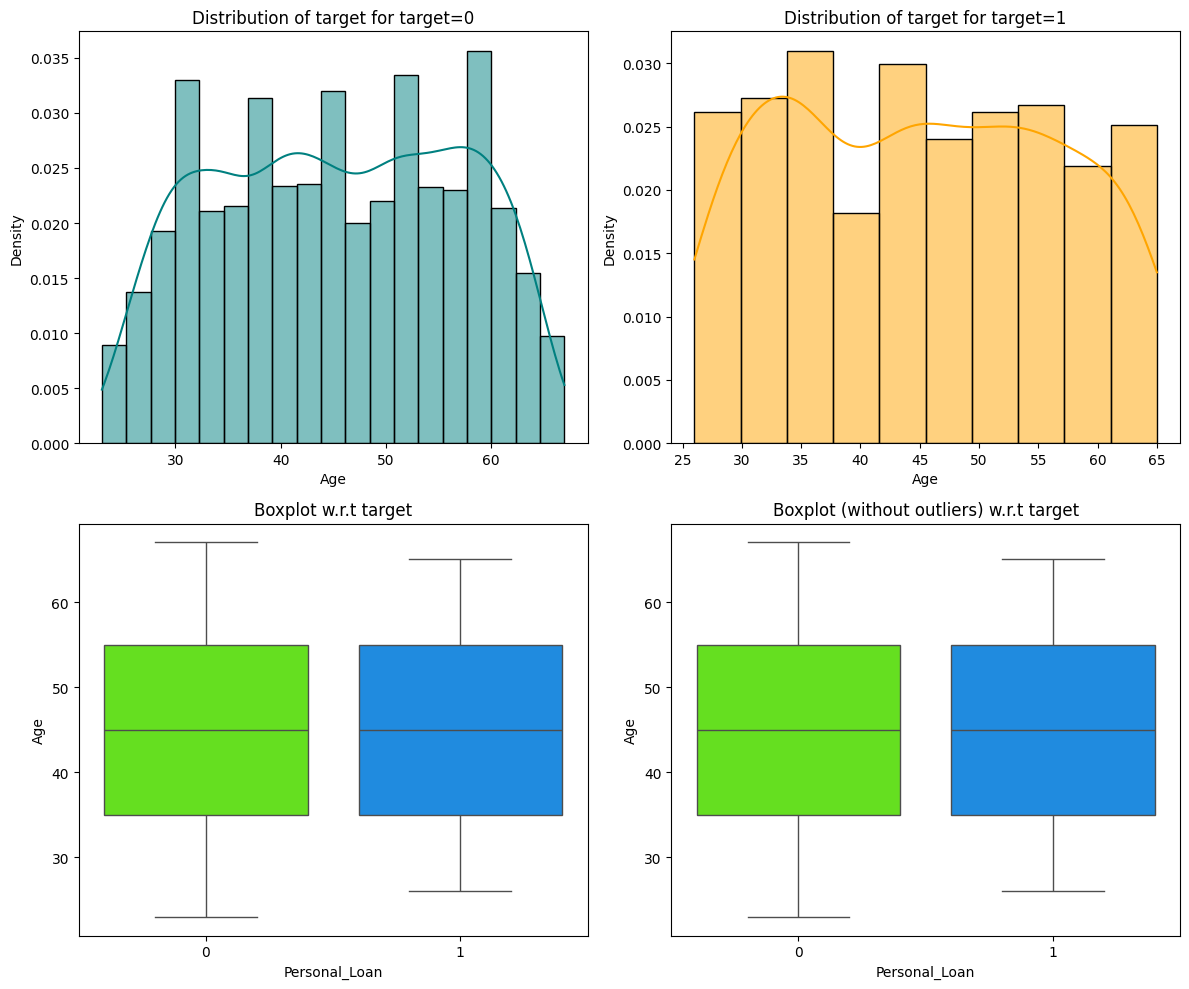

In [27]:
# Let's plot distributions of Age w.r.t Personal_Loan
distribution_plot_wrt_target(df,"Age","Personal_Loan")

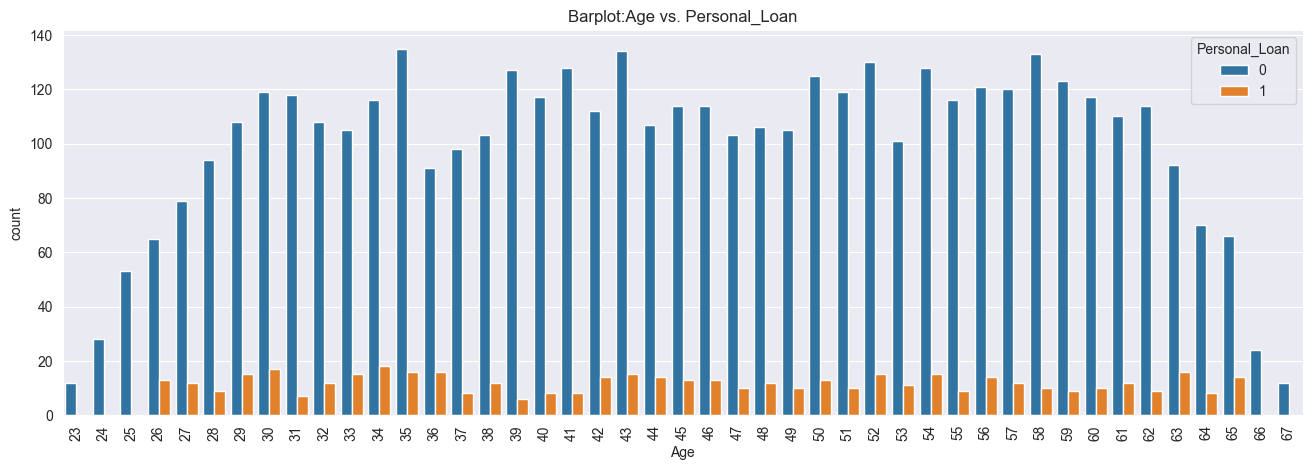

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,5))
plt.title('Barplot:Age vs. Personal_Loan')
plt.xticks(rotation=90);
sns.countplot(data=df, x='Age',hue='Personal_Loan')
plt.xlabel('Age');

**Ans 4**. The plot for Age w.r.t the availing the personal loan seems to be following a normal distribution. Although we can clearly see that the number of customers who applied for the personal loan is significantly lower than the customers who did not. But, both are following a normal distribution.
* So, it doesn't look like Age of the customer is influencing the probability of applying for Personal Loan.
* Although, we do see that customers under the age of 26 have a really low probability of applying for Personal Loan.

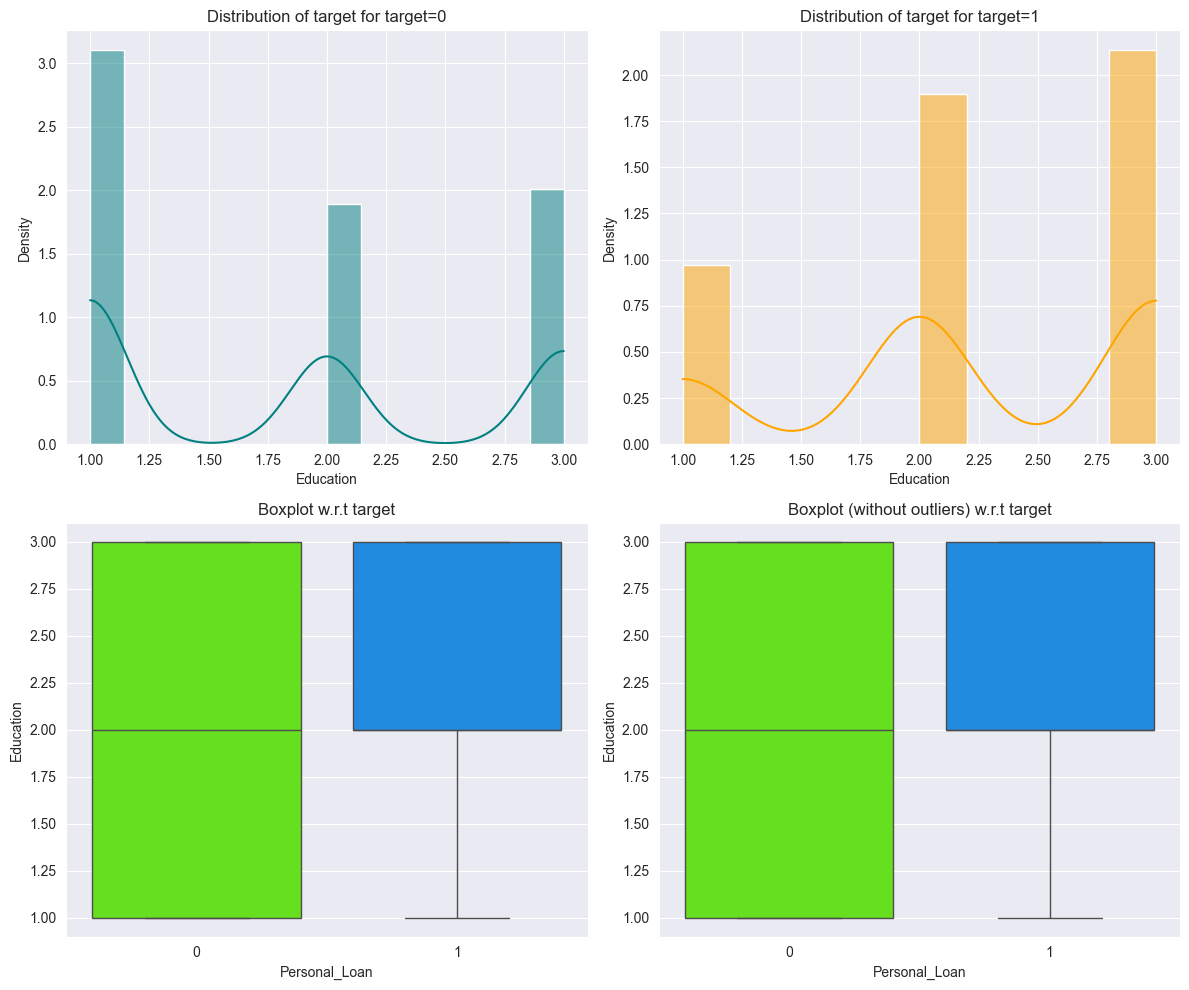

In [29]:
# Let's plot distributions of Education w.r.t Personal_Loan
distribution_plot_wrt_target(df,"Education","Personal_Loan")

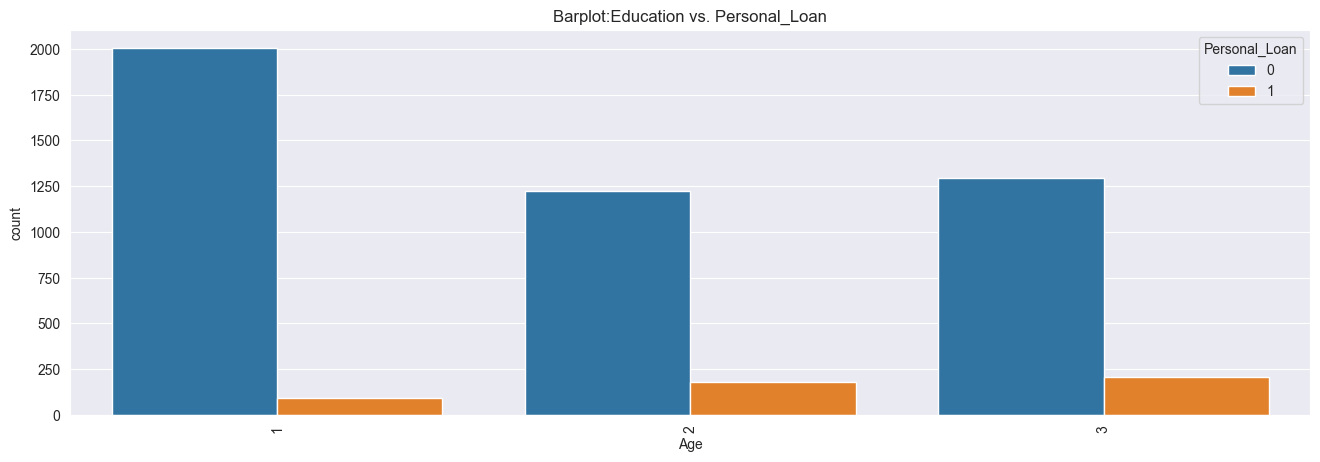

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,5))
plt.title('Barplot:Education vs. Personal_Loan')
plt.xticks(rotation=90);
sns.countplot(data=df, x='Education',hue='Personal_Loan')
plt.xlabel('Age');

**Ans 5**. We can see a slight positive correlation between the Education & Personal Loan. 
* Customers who are more educated seems to be more willing to take a Personal Loan.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

* **Missing Values** weren't really found in the dataframe. Did observe some negative values in the Experience column, which were taken care of.
* **Outlier detection and treatment** isn't required to be performed in Decision Tree based models, as they are robust to outliers and tends to adapt to them by creating splits that still maximize the purity (reducing the Gini impurity).

### Feature Engineering

In [31]:
# Let's look at the unique number of ZIP Codes in the dataset.
df["ZIPCode"].nunique()

467

* Usually **ZIP Code** must be able to help us group users based on Geography and see the pattern like that.
* However, we can see that distinct number of ZIP Codes is ***467***, which is a lot.
* Interestingly, **1st number** in a ZIP Code represents a large area in the country, like 0 is for East, ***9 is for West***
* **2nd & 3rd numbers** represents ***regional areas*** & so on.
* Hence, to be able to generalize the ZIP code & be able to group users better, we can clip to use only the first 2 numbers.
* But since we can't clip digits out of a number, we can convert the ZIP into a string and take the **first 2 characters as categories**.

In [32]:
df.ZIPCode.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: ZIPCode
Non-Null Count  Dtype
--------------  -----
5000 non-null   int64
dtypes: int64(1)
memory usage: 39.2 KB


In [33]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Convert ZIPCode as string and clipping the first 2 Characters

In [34]:
# ZIPCode Treatment
df["ZIPCode"] = df["ZIPCode"].astype(str)
df["ZIPCode"] = df["ZIPCode"].str[0:2]
df["ZIPCode"] = df["ZIPCode"].astype("category")

In [35]:
df.ZIPCode.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: ZIPCode
Non-Null Count  Dtype   
--------------  -----   
5000 non-null   category
dtypes: category(1)
memory usage: 5.4 KB


In [36]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1


### Converting all Columns with Categorical values into Datatype 'category'

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [38]:
# Converting the columns containing categorical variables into 'category' datatype would help the Decision Tree with better splitting.
# Just like we converted ZIPCode into Categorical variable, we can identify all such columns & convert them.
cat_cols = ["Family", "Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]
df[cat_cols] = df[cat_cols].astype("category")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 235.8 KB


## Data Preparation for Model Building

### Create Dummy Variables

In [40]:
df = pd.get_dummies(df, columns=['ZIPCode','Family','Education'])
# Decided to remove drop_first=True to avoid dropping the first column in this case, as it might add value to the model.
#df = pd.get_dummies(df, columns=['ZIPCode','Family','Education'], drop_first=True)

### Split Data (Train:Test)

In [41]:
# defining the dependent and independent variables
# dropping Personal_Loan as this is the dependent variable we want our model to predict
# dropping Experience as it is perfectly correlated with Age, so it wouldn't really add any more value than what Age would add.
X = df.drop(['Personal_Loan','Experience'],axis=1)
Y = df['Personal_Loan']
 
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#### Observe the split data

In [42]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 22)
Shape of test set :  (1500, 22)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

#### Function for Metrics to Evaluate Decision Tree Performance

In [43]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Func to compute diff metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    
    # predicting using the independent variables
    pred = model.predict(predictors)
    
    acc = metrics.accuracy_score(target, pred)  # to compute Accuracy
    recall = metrics.recall_score(target, pred)  # to compute Recall
    precision = metrics.precision_score(target, pred)  # to compute Precision
    f1 = metrics.f1_score(target, pred)  # to compute F1-score
    
    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1}, index=[0])
    
    return df_perf

#### Function to Create a Confusion Matrix

In [44]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = metrics.confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

In [45]:
# Let's create a Decision Tree named dTree and fit our train data into it, for the model to learn from.
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Score the Model

In [46]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9773333333333334


### Check Model Performance

#### On Train Set

In [47]:
# to check the classification metrics on train set
dTree_perf_train = model_performance_classification(dTree, X_train, y_train)
dTree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### On Test Set

In [48]:
# to check the classification metrics on test set
dTree_perf_test = model_performance_classification(dTree, X_test, y_test)
dTree_perf_test

,Accuracy,Recall,Precision,F1
0,0.977333,0.892617,0.880795,0.886667


### Confusion Matrix

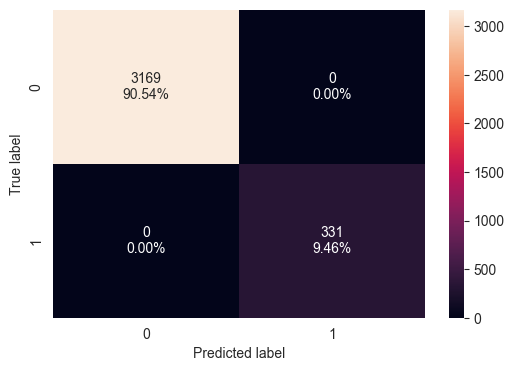

In [49]:
# to create a confusion matrix for train set
confusion_matrix_sklearn(dTree, X_train, y_train)

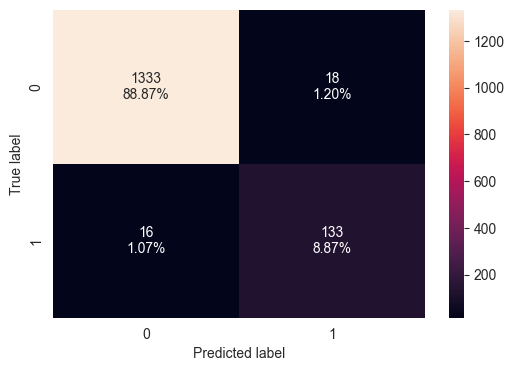

In [50]:
# to create a confusion matrix for test set
confusion_matrix_sklearn(dTree, X_test, y_test)

### Visualize the Decision Tree

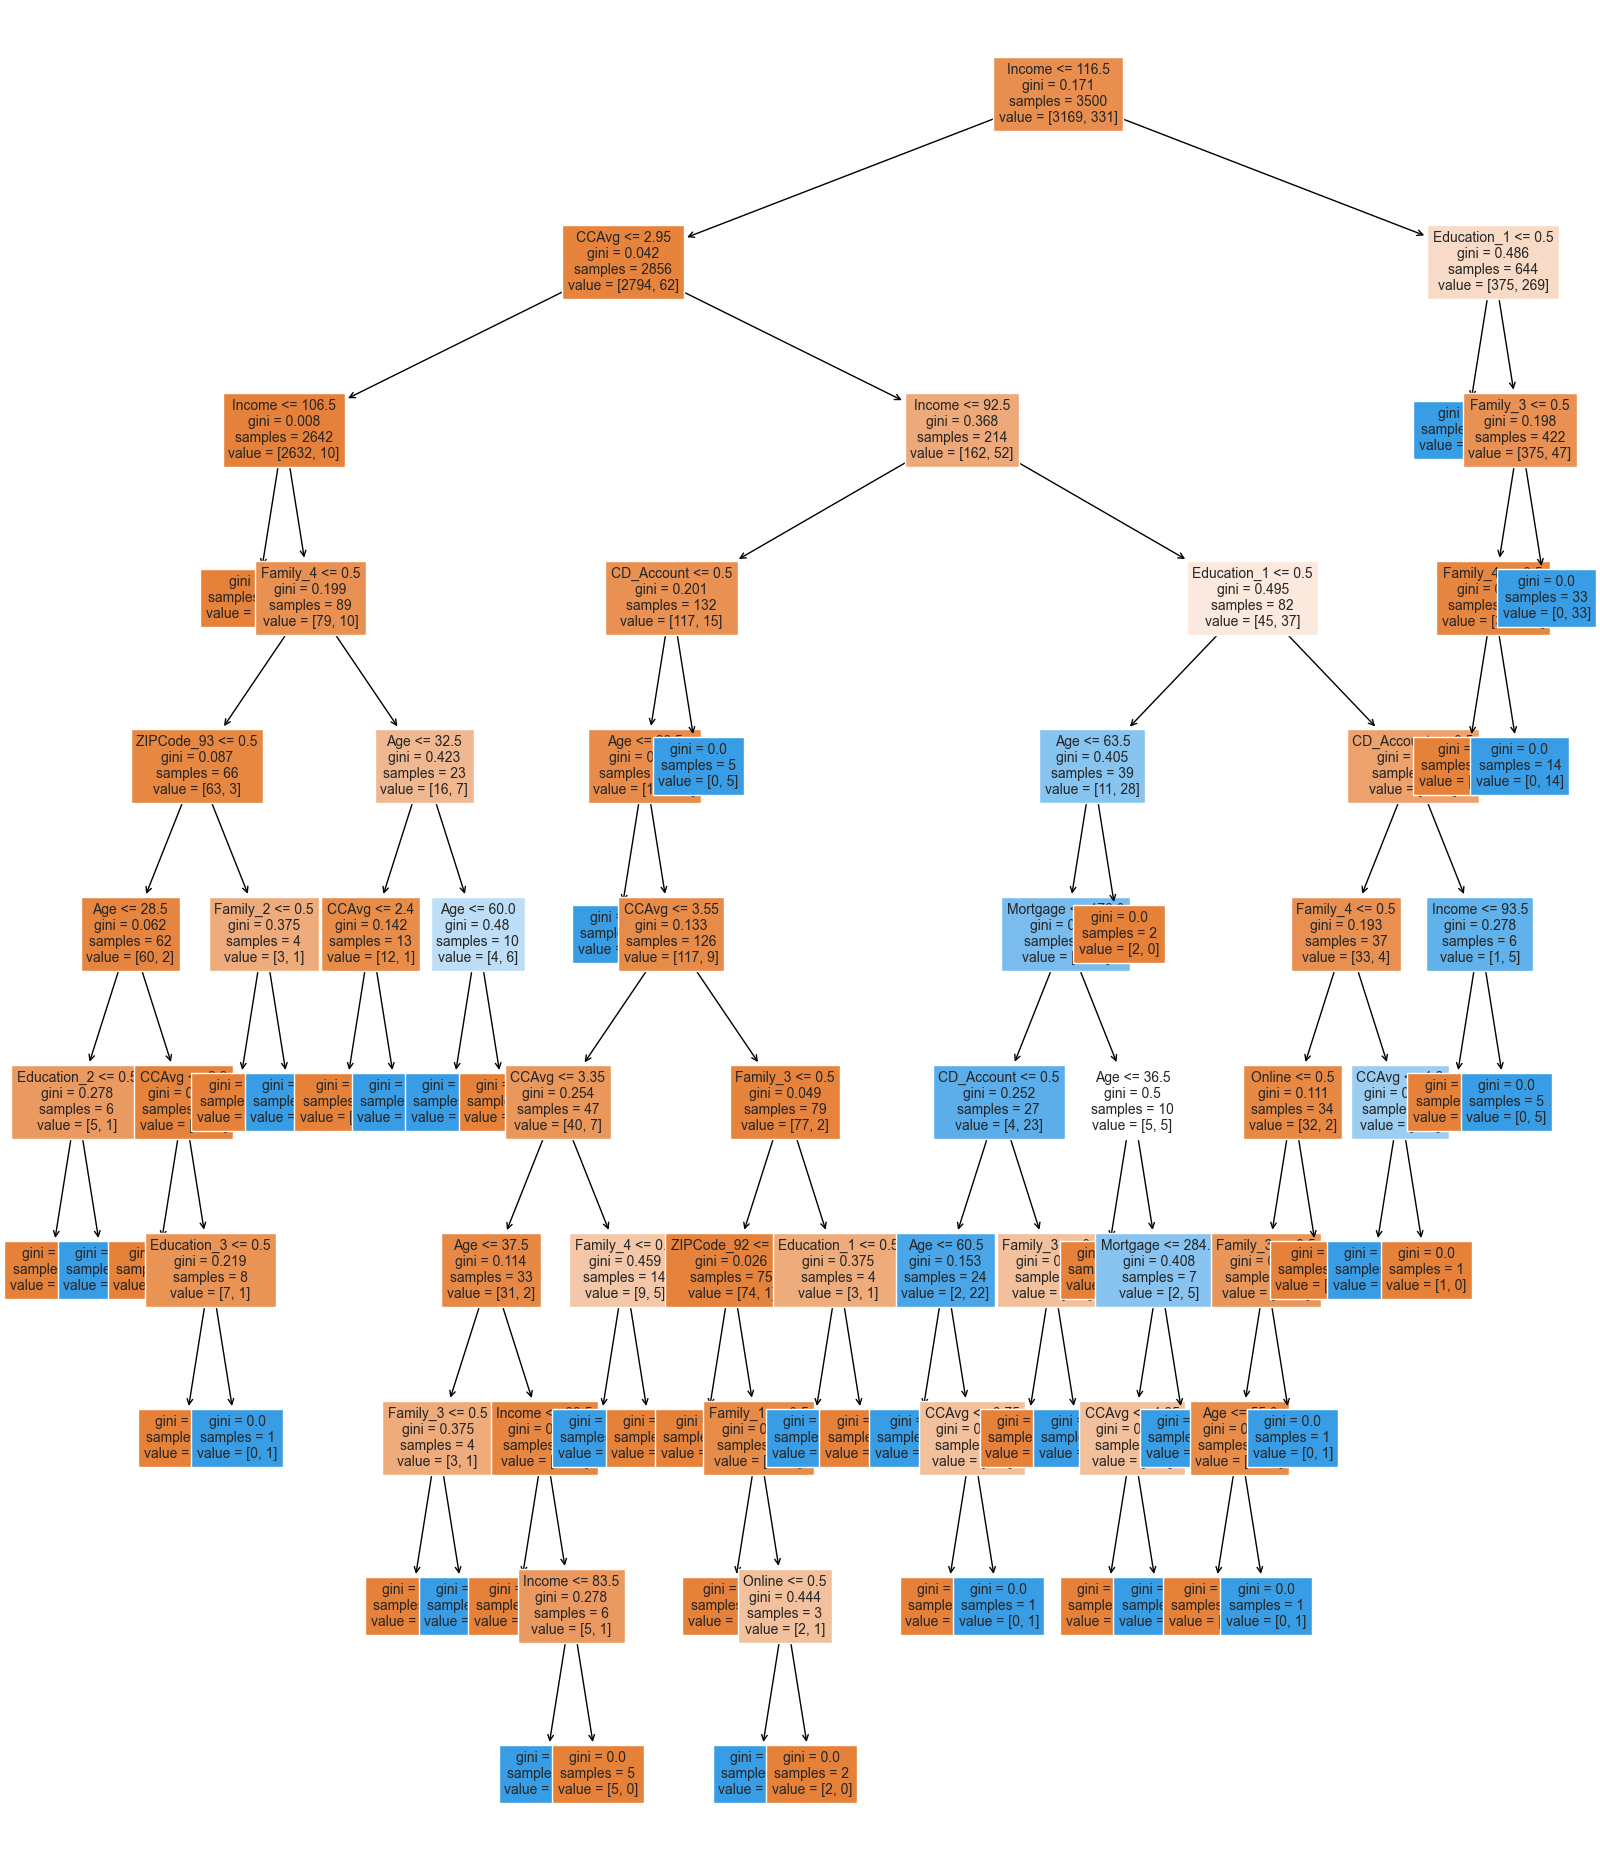

In [87]:
# Now, let's visualize the tree 
feature_names = list(X_train.columns)

plt.figure(figsize=(20, 24))
out = tree.plot_tree(dTree, feature_names=feature_names, filled=True, fontsize=10, node_ids=False, class_names=None)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Find Gini Importance

                         Imp
Education_1         0.403454
Income              0.303818
Family_3            0.102403
Family_4            0.062971
CCAvg               0.052294
Age                 0.031142
CD_Account          0.025711
Mortgage            0.005557
Education_3         0.002920
Online              0.002785
Education_2         0.002781
Family_2            0.002503
Family_1            0.000874
ZIPCode_93          0.000594
ZIPCode_92          0.000194
ZIPCode_91          0.000000
ZIPCode_90          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000
Securities_Account  0.000000


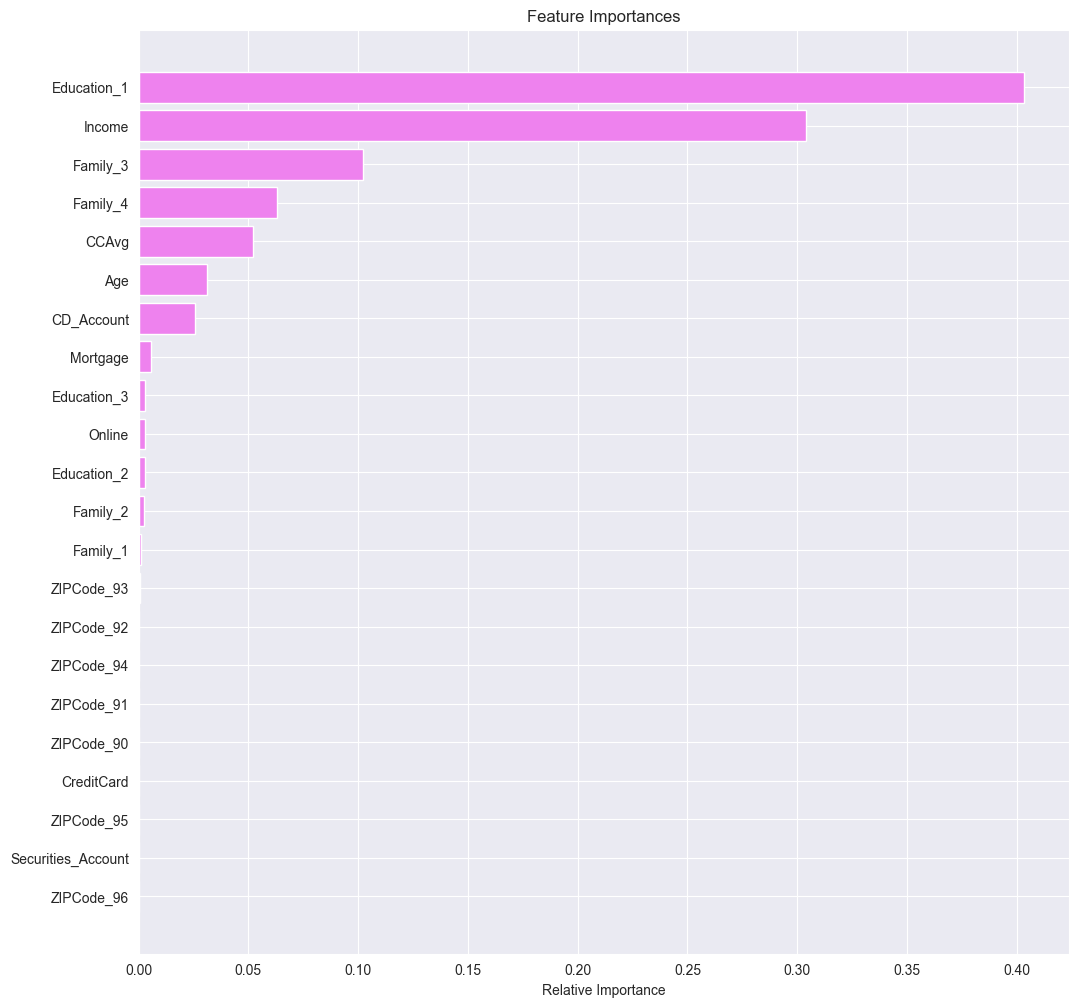

In [52]:
# Gini Importance is the importance of a feature, which is normalized total reduction of the criterion brought by that feature.
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False))

# Visualization of Gini importance for different features used in the model
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model Performance Improvement

### Pre-Pruning

#### HyperParameter Tuning using GridSearchCV

In [53]:
# Let's find out the best values for the HyperParameter, so we can perform Pre-Pruning using best posssible values
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

#### Best Values for HyperParameters
* max_depth = **5**
* max_leaf_nodes = **10**
* min_impurity_decrease = **0.001**
* min_samples_leaf = **5**
* random_state = **1**

In [54]:
print(grid_obj.best_params_)

{'max_depth': 5, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1}


### Build Pre-Pruned Decision Tree using the identified HyperParameters

In [55]:
dTree_pre_pruned = DecisionTreeClassifier(criterion = 'gini', max_depth=5, max_leaf_nodes=10, 
                                          min_impurity_decrease=0.001, min_samples_leaf=5, random_state=1)
dTree_pre_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       random_state=1)

### Score the Pre-Pruned Model

In [56]:
print("Accuracy on training set : ",dTree_pre_pruned.score(X_train, y_train))
print("Accuracy on test set : ",dTree_pre_pruned.score(X_test, y_test))

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333


### Check Pre-Pruned Model Performance

#### On Train Set

In [57]:
# to check the classification metrics on train set
dTree_pre_pruned_perf_train = model_performance_classification(dTree_pre_pruned, X_train, y_train)
dTree_pre_pruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.989714,0.927492,0.962382,0.944615


#### On Test Set

In [58]:
# to check the classification metrics on test set
dTree_pre_pruned_perf_test = model_performance_classification(dTree_pre_pruned, X_test, y_test)
dTree_pre_pruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.981333,0.879195,0.929078,0.903448


### Confusion Matrix for Pre-Pruned Model

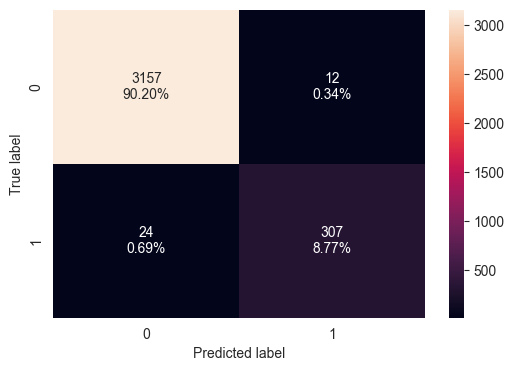

In [59]:
# to create a confusion matrix for train set
confusion_matrix_sklearn(dTree_pre_pruned, X_train, y_train)

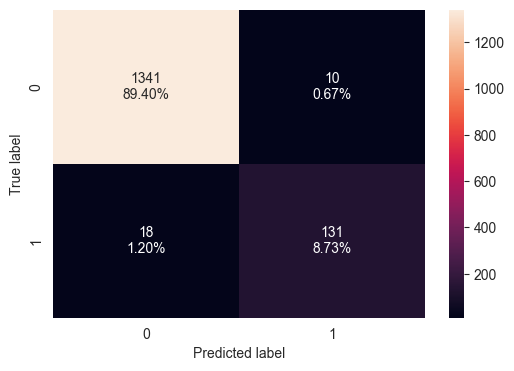

In [60]:
# to create a confusion matrix for test set
confusion_matrix_sklearn(dTree_pre_pruned, X_test, y_test)

### Visualize the Decision Tree for Pre-Pruned Model

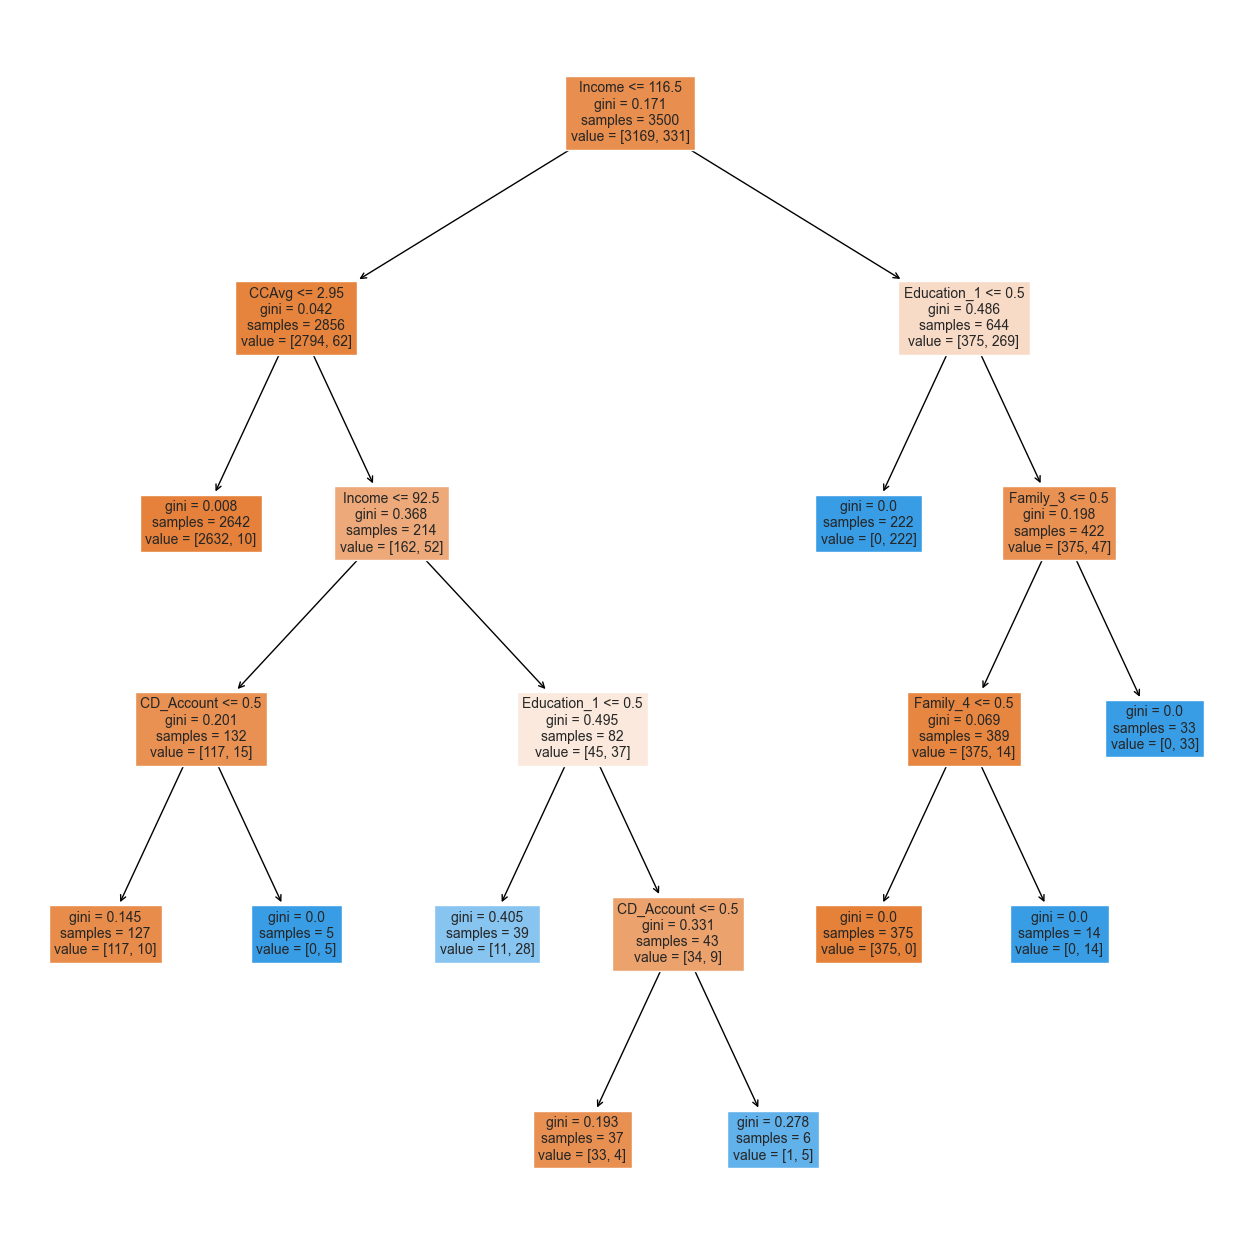

In [83]:
# Now, let's visualize the tree 
feature_names = list(X_train.columns)

plt.figure(figsize=(16, 16))
out = tree.plot_tree(dTree_pre_pruned, feature_names=feature_names, filled=True, fontsize=10, node_ids=False, class_names=None)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Find Gini Importance for Pre-Pruned Model

                         Imp
Education_1         0.447999
Income              0.328713
Family_3            0.105394
Family_4            0.050317
CCAvg               0.042231
CD_Account          0.025345
Age                 0.000000
ZIPCode_95          0.000000
Education_2         0.000000
Family_2            0.000000
Family_1            0.000000
ZIPCode_96          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_92          0.000000
ZIPCode_91          0.000000
ZIPCode_90          0.000000
CreditCard          0.000000
Online              0.000000
Securities_Account  0.000000
Mortgage            0.000000
Education_3         0.000000


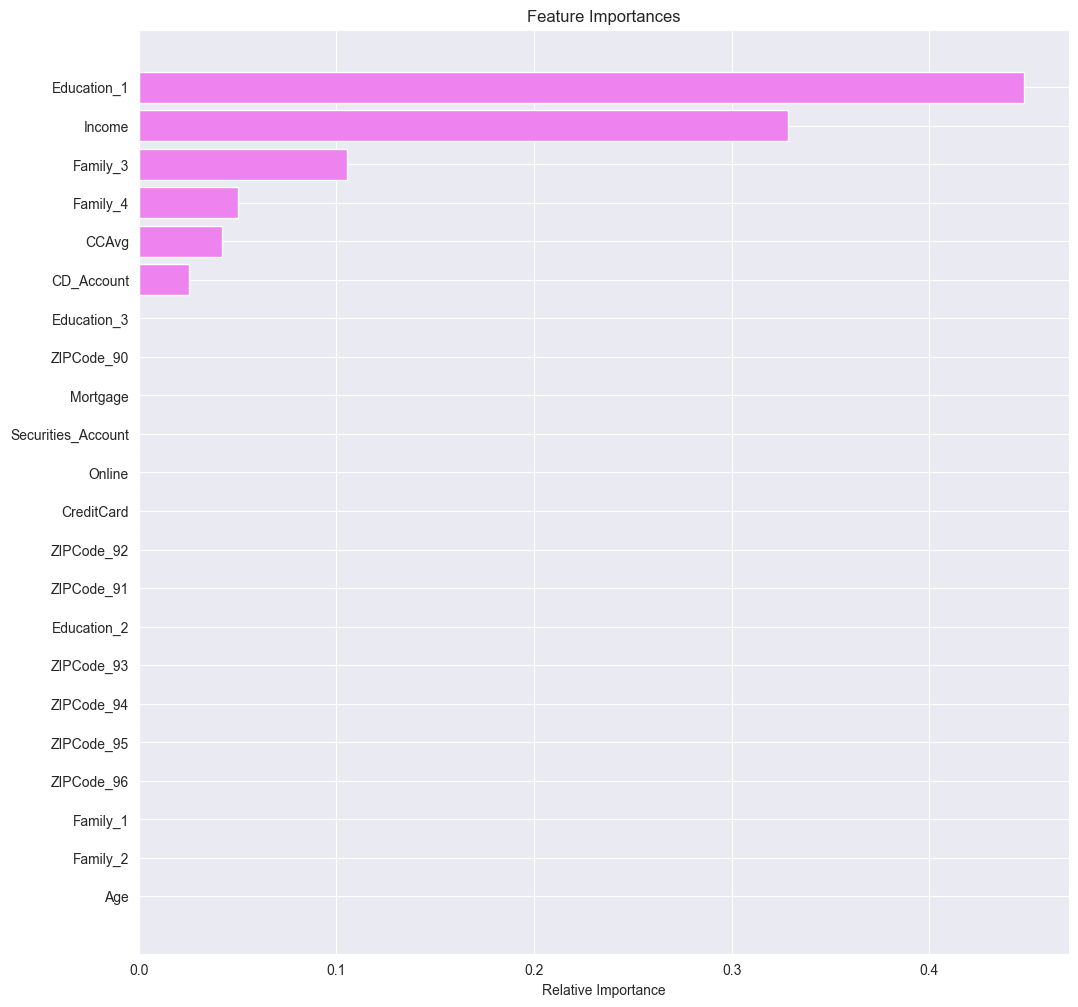

In [62]:
# Gini Importance is the importance of a feature, which is normalized total reduction of the criterion brought by that feature.
print (pd.DataFrame(dTree_pre_pruned.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False))

# Visualization of Gini importance for different features used in the model
importances = dTree_pre_pruned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Post-Pruning

#### Cost Complexity Pruning

* In DecisionTreeClassifier, Post pruning technique is parameterized by the cost complexity parameter, **ccp_alpha**.
    * Greater values of **ccp_alpha** increase the number of nodes pruned.

In [63]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-6.939665e-15
1,3.853725e-19,-6.939279e-15
2,3.853725e-19,-6.938894e-15
3,3.853725e-19,-6.938509e-15
4,3.853725e-19,-6.938123e-15
5,5.255079e-19,-6.937598e-15
6,5.255079e-19,-6.937072e-15
7,7.707449e-19,-6.936301e-15
8,1.051016e-18,-6.935250e-15
9,8.338059e-18,-6.926912e-15


#### Total Impurity vs Effective alpha for training set

* Minimal cost complexity pruning recursively finds the node with the ***"weakest link"***.
    * The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first.
* To get an idea of what values of **ccp_alpha** could be appropriate, scikit-learn provides ***DecisionTreeClassifier.cost_complexity_pruning_path*** that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process.
    * As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

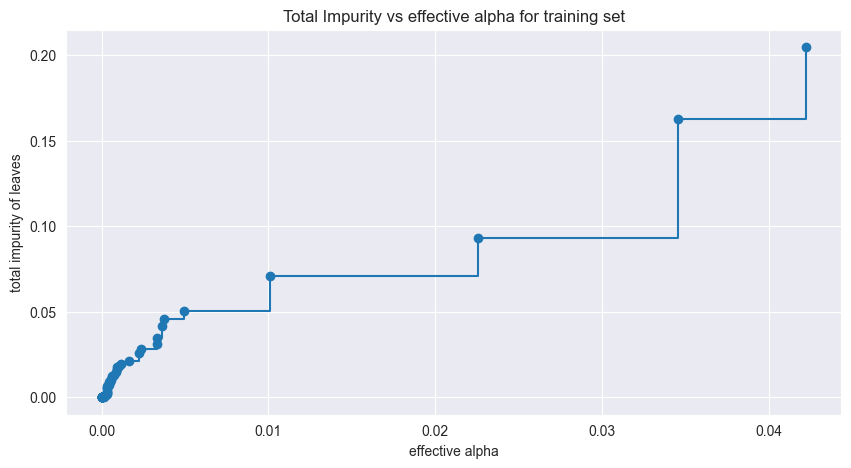

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [65]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced")
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992315


#### Number of nodes & Depth vs alpha

* For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. 
* Here we show that the number of nodes and tree depth decreases as alpha increases.

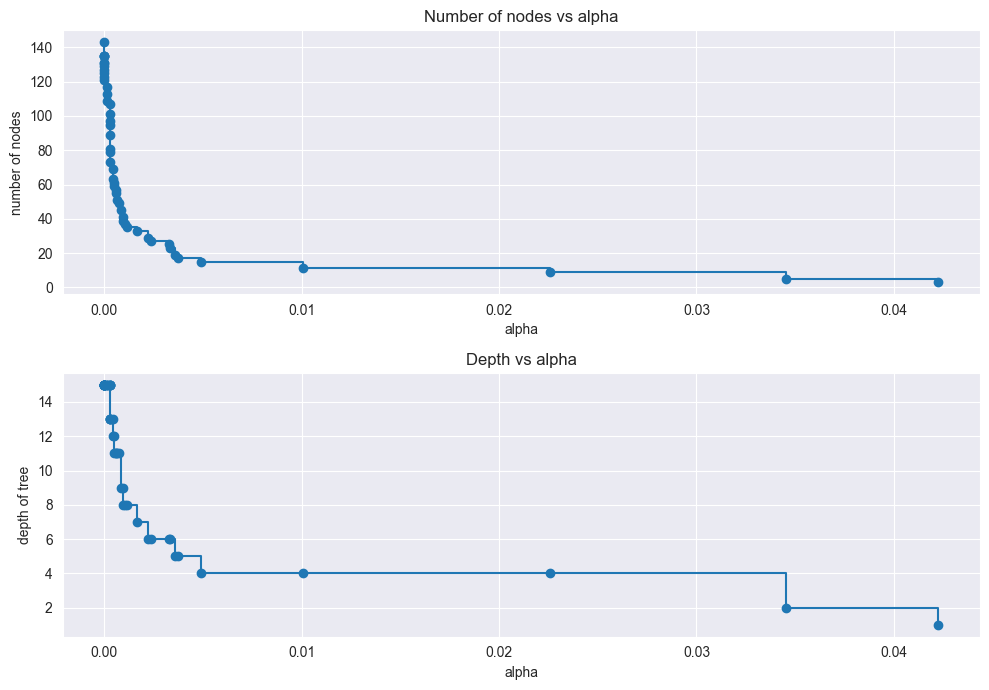

In [66]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Accuracy vs Alpha for training and testing sets

#### Recall Train

In [67]:
recall_train=[]
for clf in clfs:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    recall_train.append(values_train)

#### Recall Test

In [68]:
recall_test=[]
for clf in clfs:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    recall_test.append(values_test)

#### Visualization

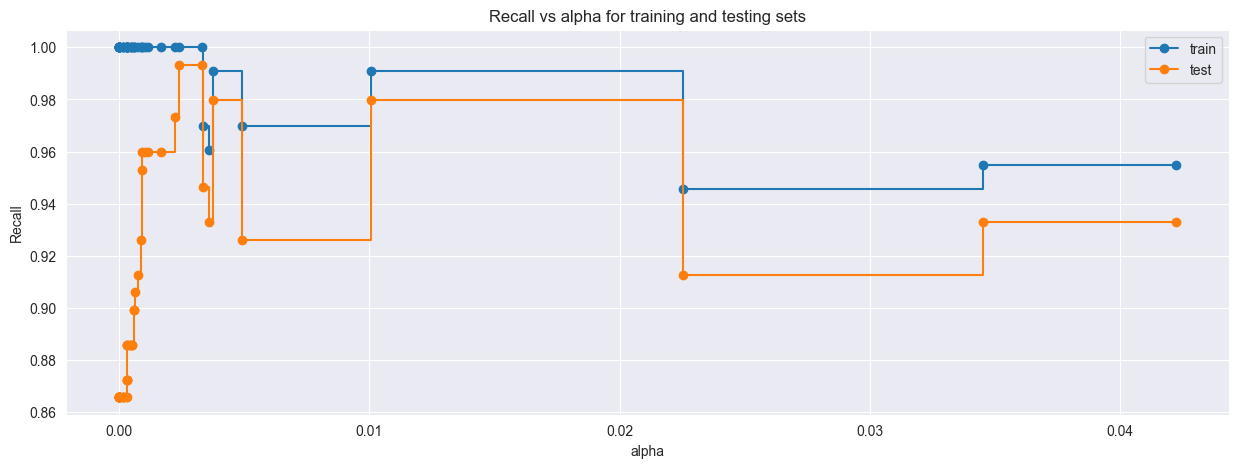

In [69]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Identify Best Post-Pruned Model

In [70]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
dTree_post_pruned = clfs[index_best_model]
print(dTree_post_pruned) 

DecisionTreeClassifier(ccp_alpha=0.002375808619774645, class_weight='balanced',
                       random_state=1)


### Score the Post-Pruned Model

In [71]:
print("Accuracy on training set : ",dTree_post_pruned.score(X_train, y_train))
print("Accuracy on test set : ",dTree_post_pruned.score(X_test, y_test))

Accuracy on training set :  0.96
Accuracy on test set :  0.9533333333333334


### Check Post-Pruned Model Performance

#### On Train Set

In [72]:
# to check the classification metrics on train set
dTree_post_pruned_perf_train = model_performance_classification(dTree_post_pruned, X_train, y_train)
dTree_post_pruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.96,1.0,0.70276,0.825436


#### On Test Set

In [73]:
# to check the classification metrics on test set
dTree_post_pruned_perf_test = model_performance_classification(dTree_post_pruned, X_test, y_test)
dTree_post_pruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.953333,0.993289,0.682028,0.808743


### Confusion Matrix for Post-Pruned Model

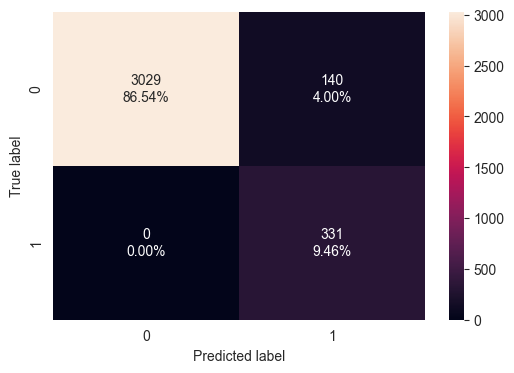

In [74]:
# to create a confusion matrix for train set
confusion_matrix_sklearn(dTree_post_pruned, X_train, y_train)

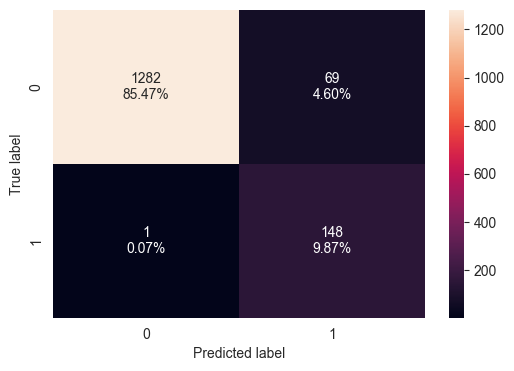

In [75]:
# to create a confusion matrix for test set
confusion_matrix_sklearn(dTree_post_pruned, X_test, y_test)

### Visualize the Decision Tree for Post-Pruned Model

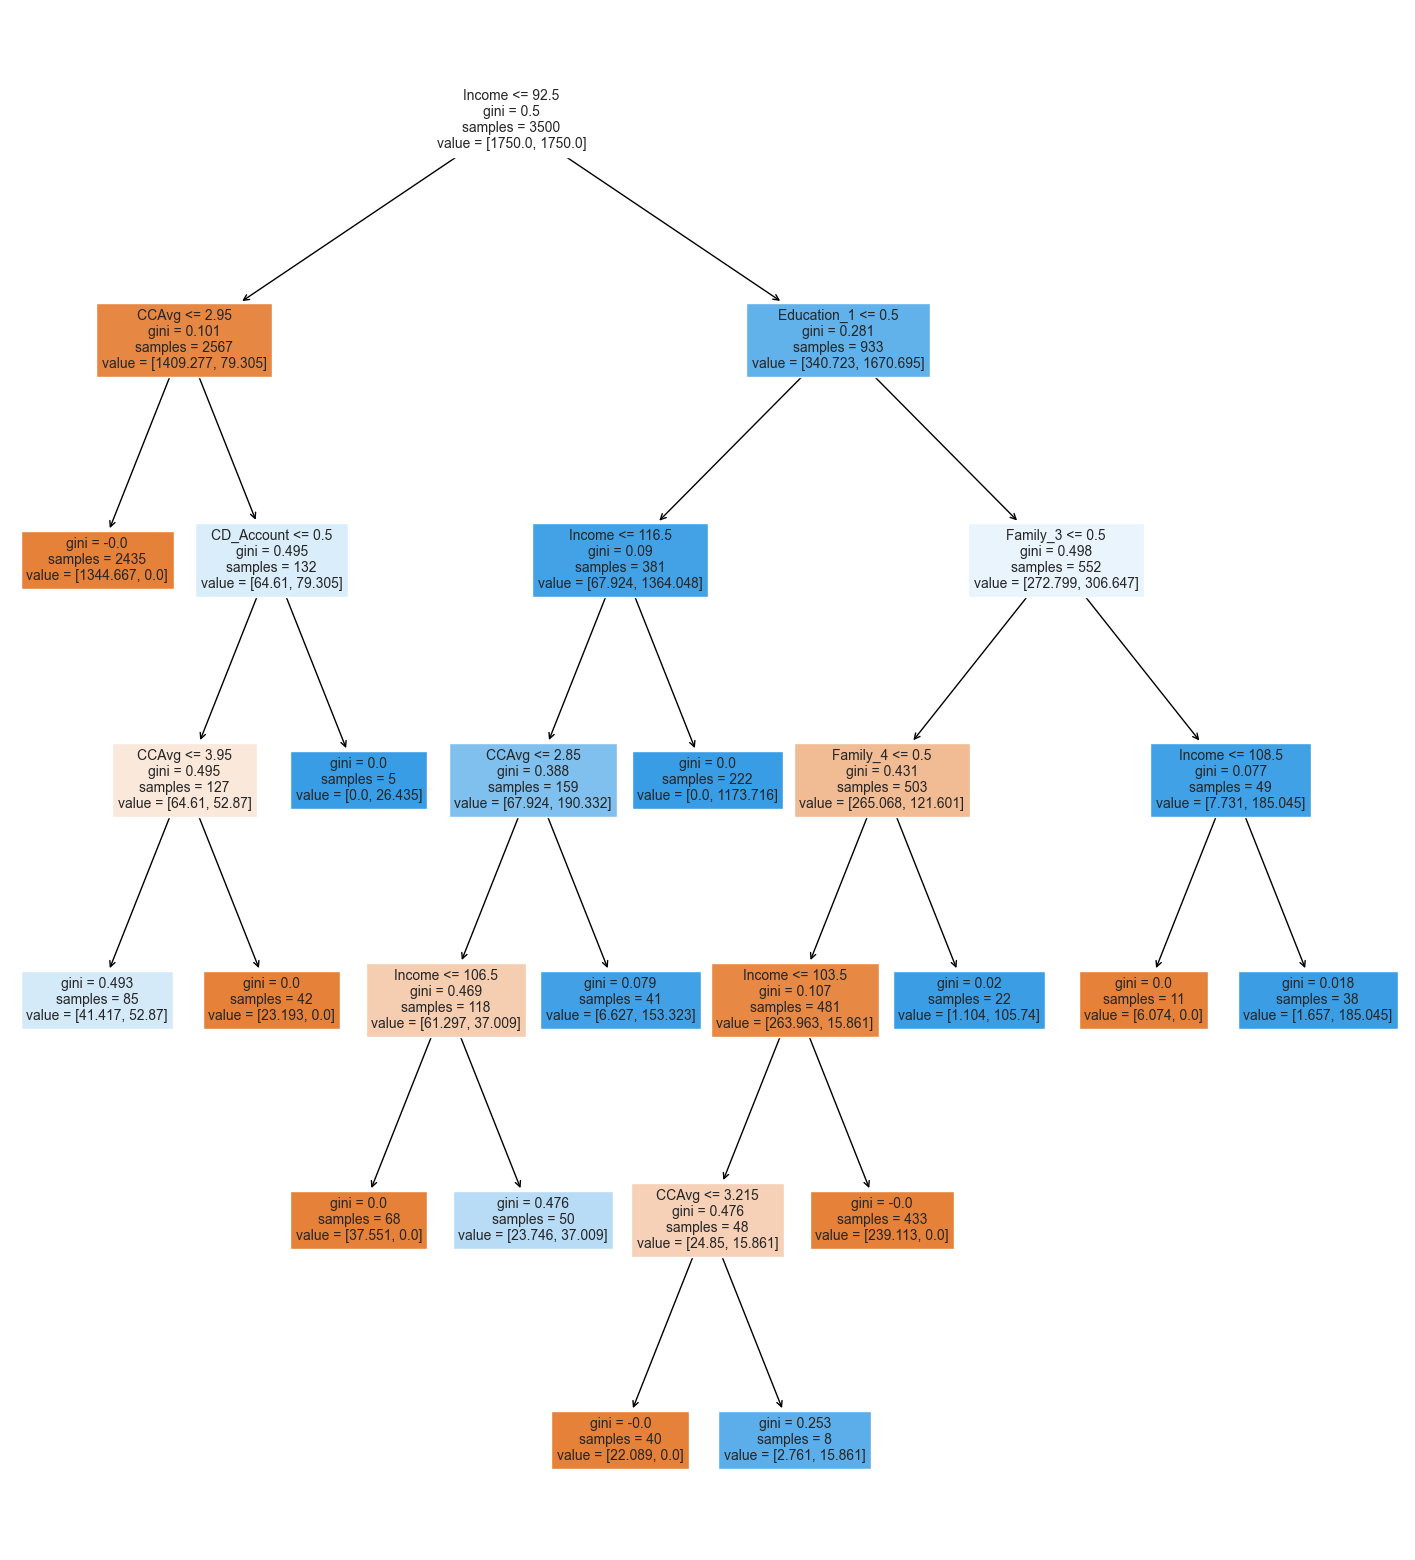

In [85]:
# Now, let's visualize the tree 
feature_names = list(X_train.columns)

plt.figure(figsize=(18, 20))
out = tree.plot_tree(dTree_post_pruned, feature_names=feature_names, filled=True, fontsize=10, node_ids=False, class_names=None)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Find Gini Importance for Post-Pruned Model

                         Imp
Income              0.667449
Education_1         0.089526
CCAvg               0.088742
Family_4            0.081495
Family_3            0.064885
CD_Account          0.007903
Age                 0.000000
ZIPCode_95          0.000000
Education_2         0.000000
Family_2            0.000000
Family_1            0.000000
ZIPCode_96          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_92          0.000000
ZIPCode_91          0.000000
ZIPCode_90          0.000000
CreditCard          0.000000
Online              0.000000
Securities_Account  0.000000
Mortgage            0.000000
Education_3         0.000000


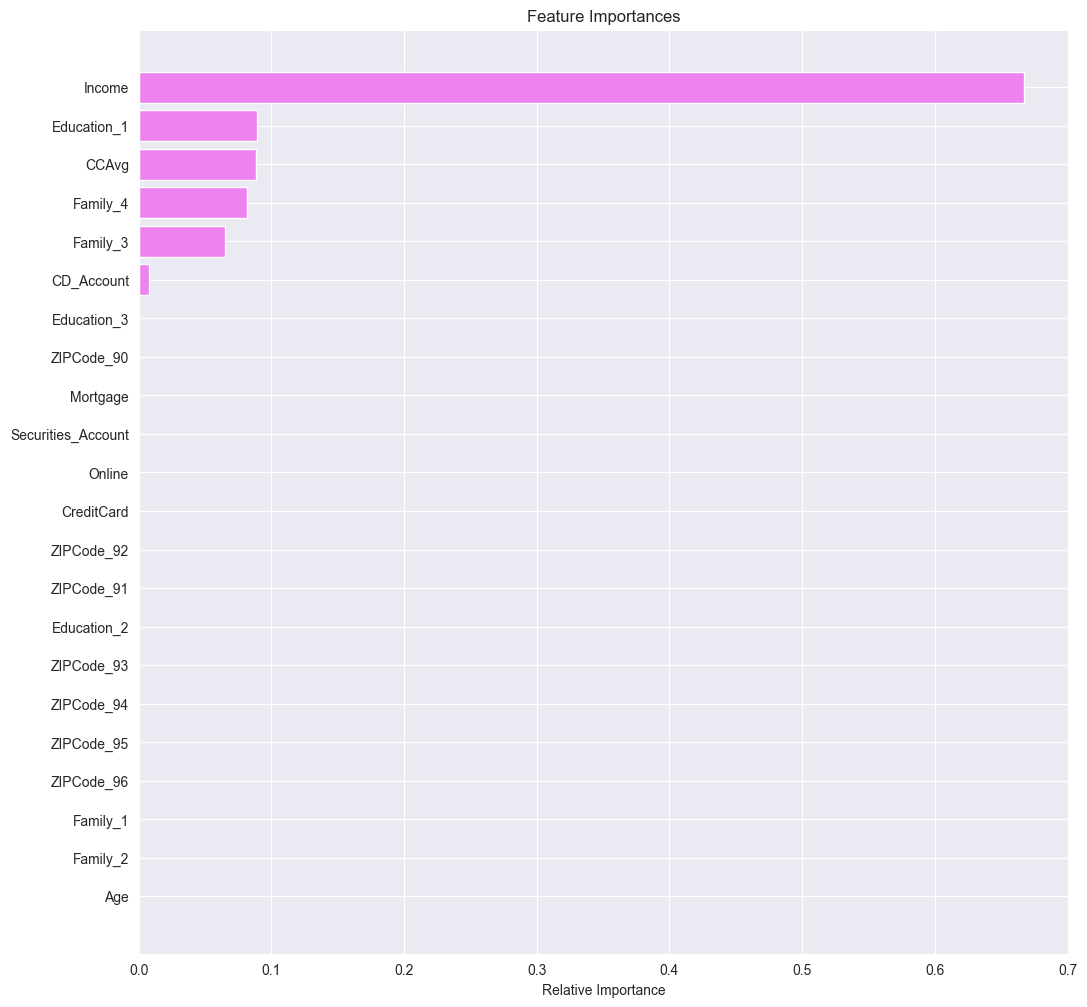

In [77]:
# Gini Importance is the importance of a feature, which is normalized total reduction of the criterion brought by that feature.
print (pd.DataFrame(dTree_post_pruned.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False))

# Visualization of Gini importance for different features used in the model
importances = dTree_post_pruned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Comparison and Final Model Selection

### Comparing Training Performance

In [78]:
models_train_comp_df = pd.concat([dTree_perf_train.T, dTree_pre_pruned_perf_train.T, dTree_post_pruned_perf_train.T], axis=1)
models_train_comp_df.columns = ["Decision Tree (Default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (Default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.989714,0.960000
Recall,1.0,0.927492,1.000000
Precision,1.0,0.962382,0.702760
F1,1.0,0.944615,0.825436


### Comparing Testing Performance

In [79]:
models_test_comp_df = pd.concat([dTree_perf_test.T, dTree_pre_pruned_perf_test.T, dTree_post_pruned_perf_test.T], axis=1)
models_test_comp_df.columns = ["Decision Tree (Default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree (Default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.977333,0.981333,0.953333
Recall,0.892617,0.879195,0.993289
Precision,0.880795,0.929078,0.682028
F1,0.886667,0.903448,0.808743


## Actionable Insights and Business Recommendations


* **Use Case**: **Target Identification**
* **Business Objective**: *Bank wants to increase its revenue by growing their **asset customer** base, while retaining their **liability customer** base, by offering targeted & personalized Personal loans to prospective loan applicants among their liability customers, instead of bulk notifications being sent to all customers, which doesn't really attract customers.*
* In the context of Model predictions, there could be 2 types of errors:
    * **Type 1 Error**: **False Positive**:
        * So, the model predicted that customer will apply for Personal Loan -> Bank reached out to customer offering loan -> Customer Denied.
    * **Type 2 Error**: **False Negative**:
        * So, the model predicted that the customer will not apply for Personal Loan -> Bank doesn't reach out a customer that would have purchased the loan
* In this case, the Bank would be more tolerant to **Type 1** errors for reaching out to the customer, but getting denied.
* However, **Type 2** errors are bad for business, as a prospective customer wouldn't be identified or reached, leading to ***Opportunity loss***.
* The customers that falls within the **True Positive** area, are the sure-shot customers and should definitely be reached out to, as there is a very high conversion rate.
* It might be also beneficial for the bank to understand & investigate on what could motivate the large customer base falling under the **True Negative** area, that the model identifies as non-potential customers & it turns out to be true.
    * In case of these customers, the Bank might want to figure out a better offering, that better meets their need.
        * For e.g. it was observed that *customers under 26 yrs old haven't taken a Personal Loan from the last campaign*. However, at that age, the customers might be more motivated to purchase an Education loan or an Auto loan, offered at a competitive rate.
* Here, **Model Accuracy** wouldn't be great measure, as this is a classification problem. So, we need to select the model with the highest **Recall**, as we want to reduce the **Type 2** errors or **False Negatives**.
* Even if the **Precision** is lower, it is tolerable to the business as this represents the portion of customers that were predicted to be prospective customers by the model, but they denied the loan offerings. This is okay, as the loss to the bank is *only wasted effort* in converting the customer, but it still goes as a Customer Relationship Engagements, so no real loss here.
* Based on all these aspects, we can conclude that the **Post-Pruned Decision Tree** with the **highest recall of 0.993289** would be the best model to predict the prospective customer & offer tailored Personal loan to them.
    * We can see that the **Post-Pruned** tree seems to be *lowest in Precision score*. However, as already mentioned, this wouldn't really matter in the current Use-case.

___